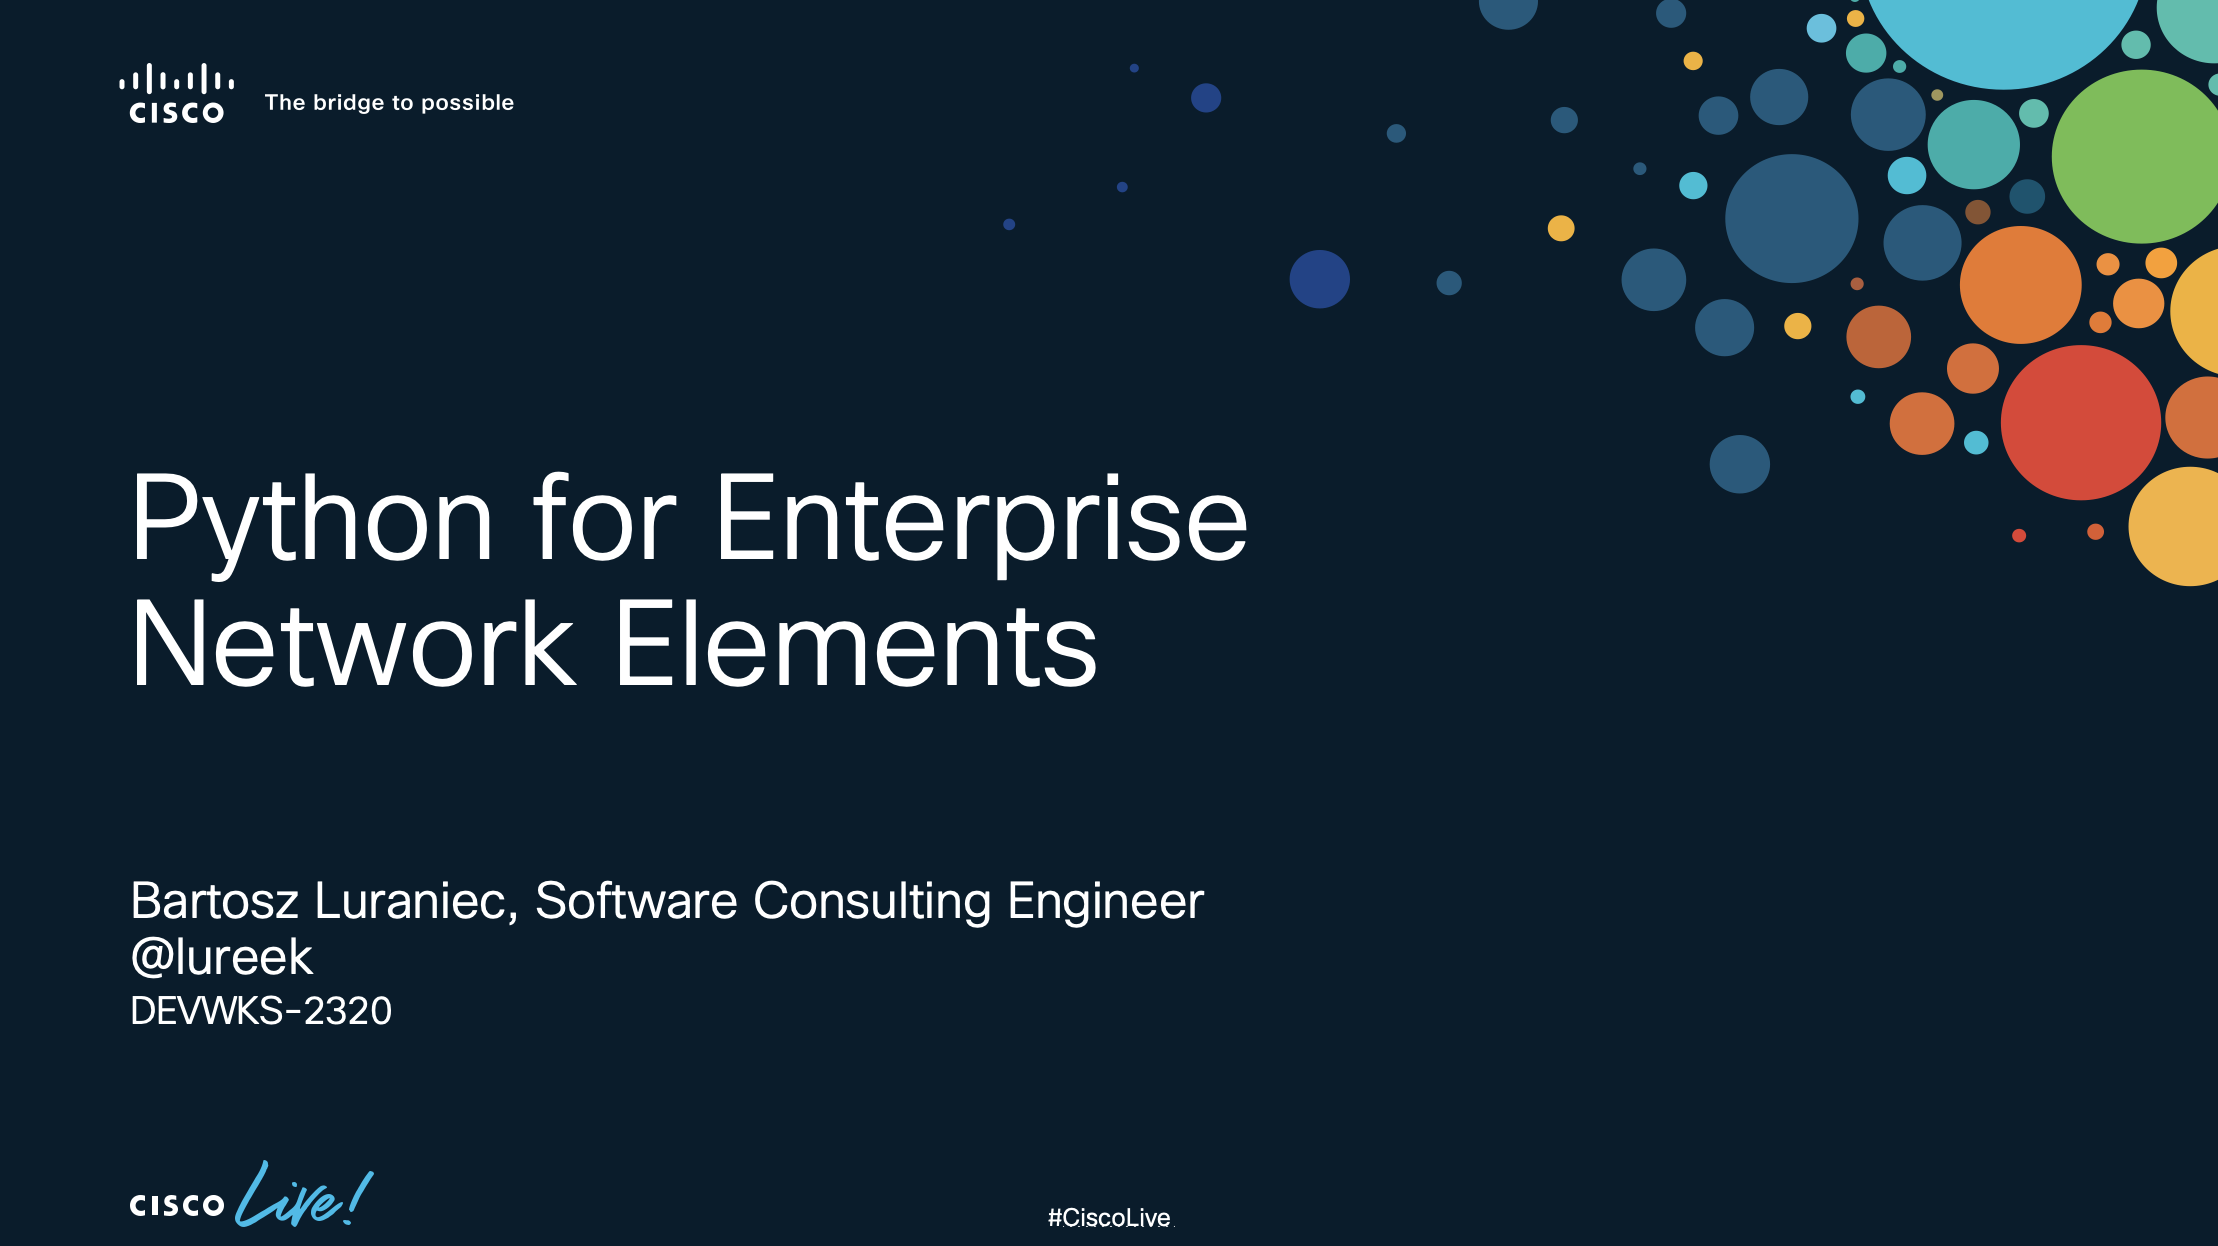

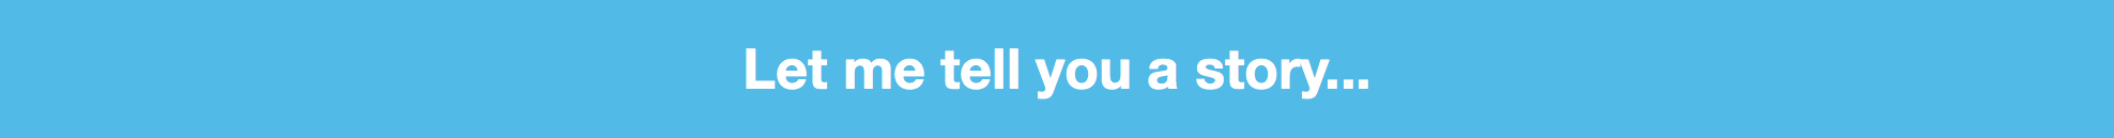

<center><i>Imagine that a customer calls you and asks you to check if his network device's interfaces configuration is compliant with the template spreadsheet configuration which he sent to you. If something is incorrect, please configure it as it stands in the spreadsheet.</i><br><br><center>
<center><b>Sure! No problem!</b><center>

<center>
<center>
<video width="100%" height="50%" controls src="first.mov" />
</center>
</center>

<center><b>Done Dear Customer!</b><br> 
But there are hundreds of other devices to check and correct... <br><br>REALLY?! 

</center>

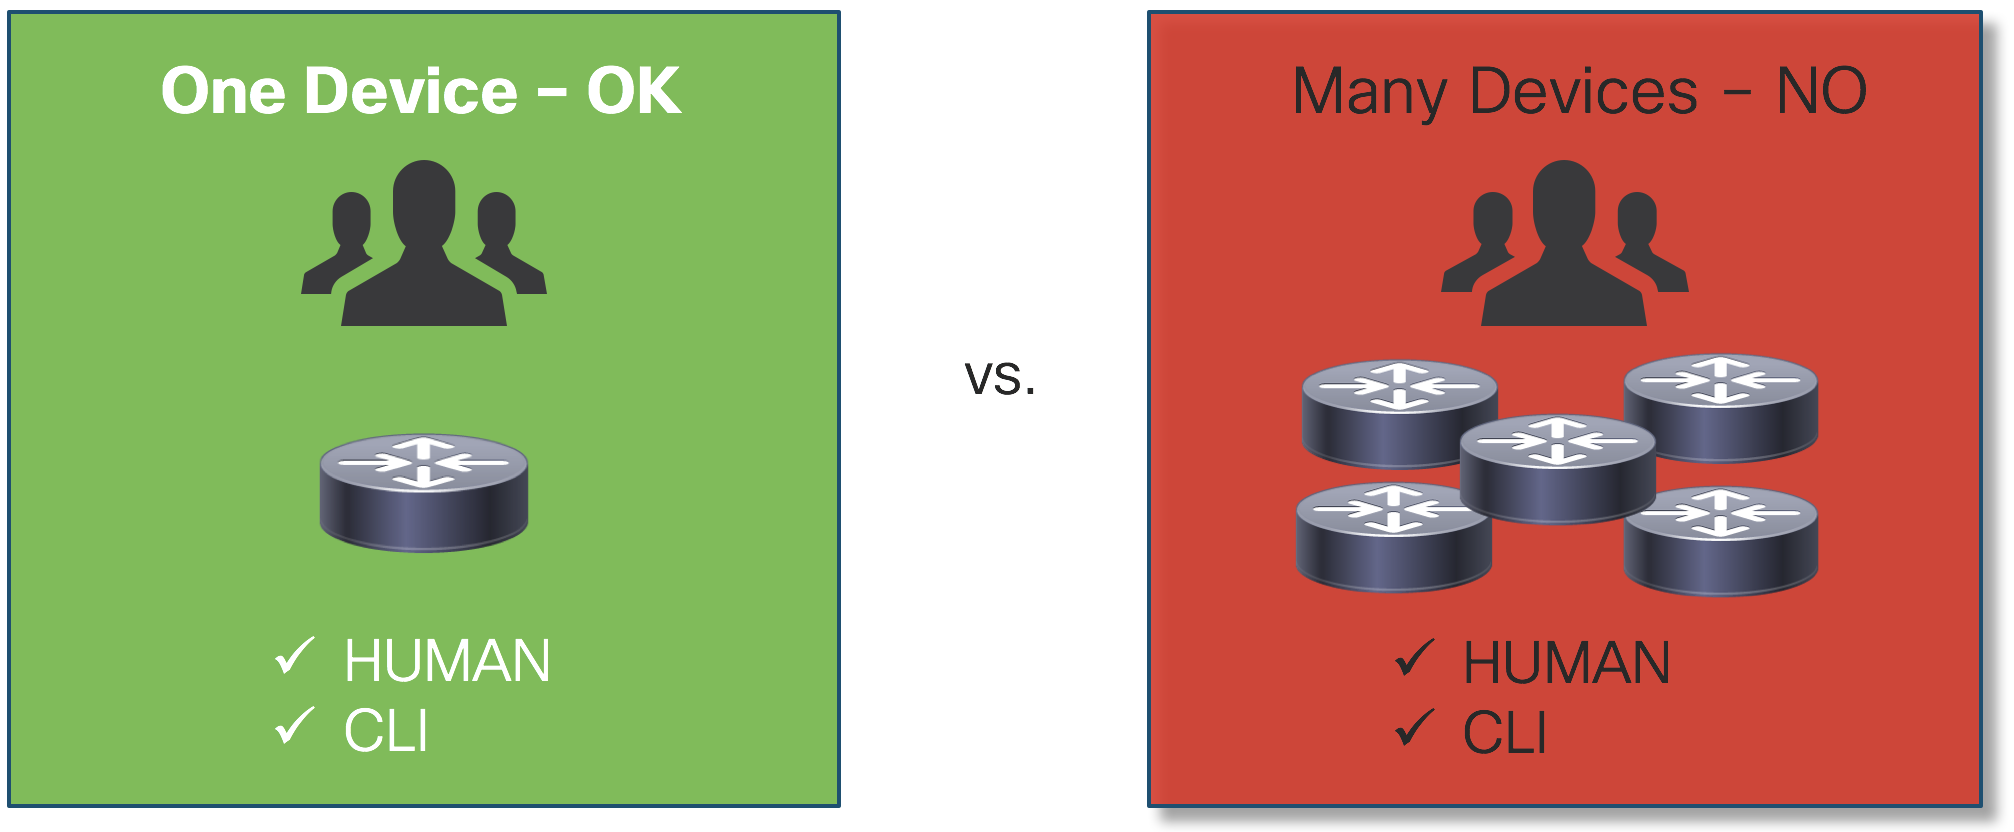

<font style="zoom:200%;"> <center>**Is there a solution?!** </center> </font>

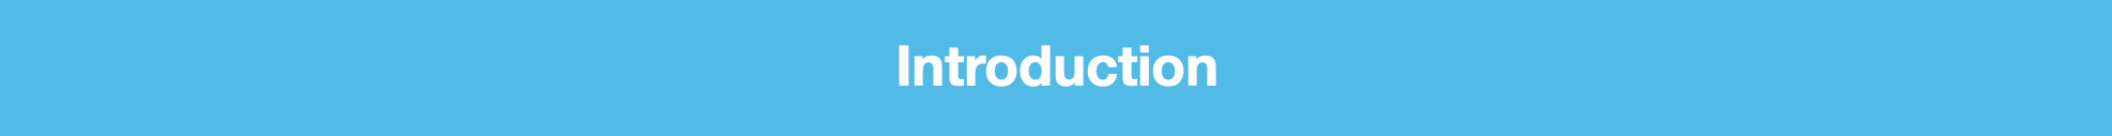

<center>Now it's the right time to introduce you to the <b>Network Programmability</b> topics!</center> 

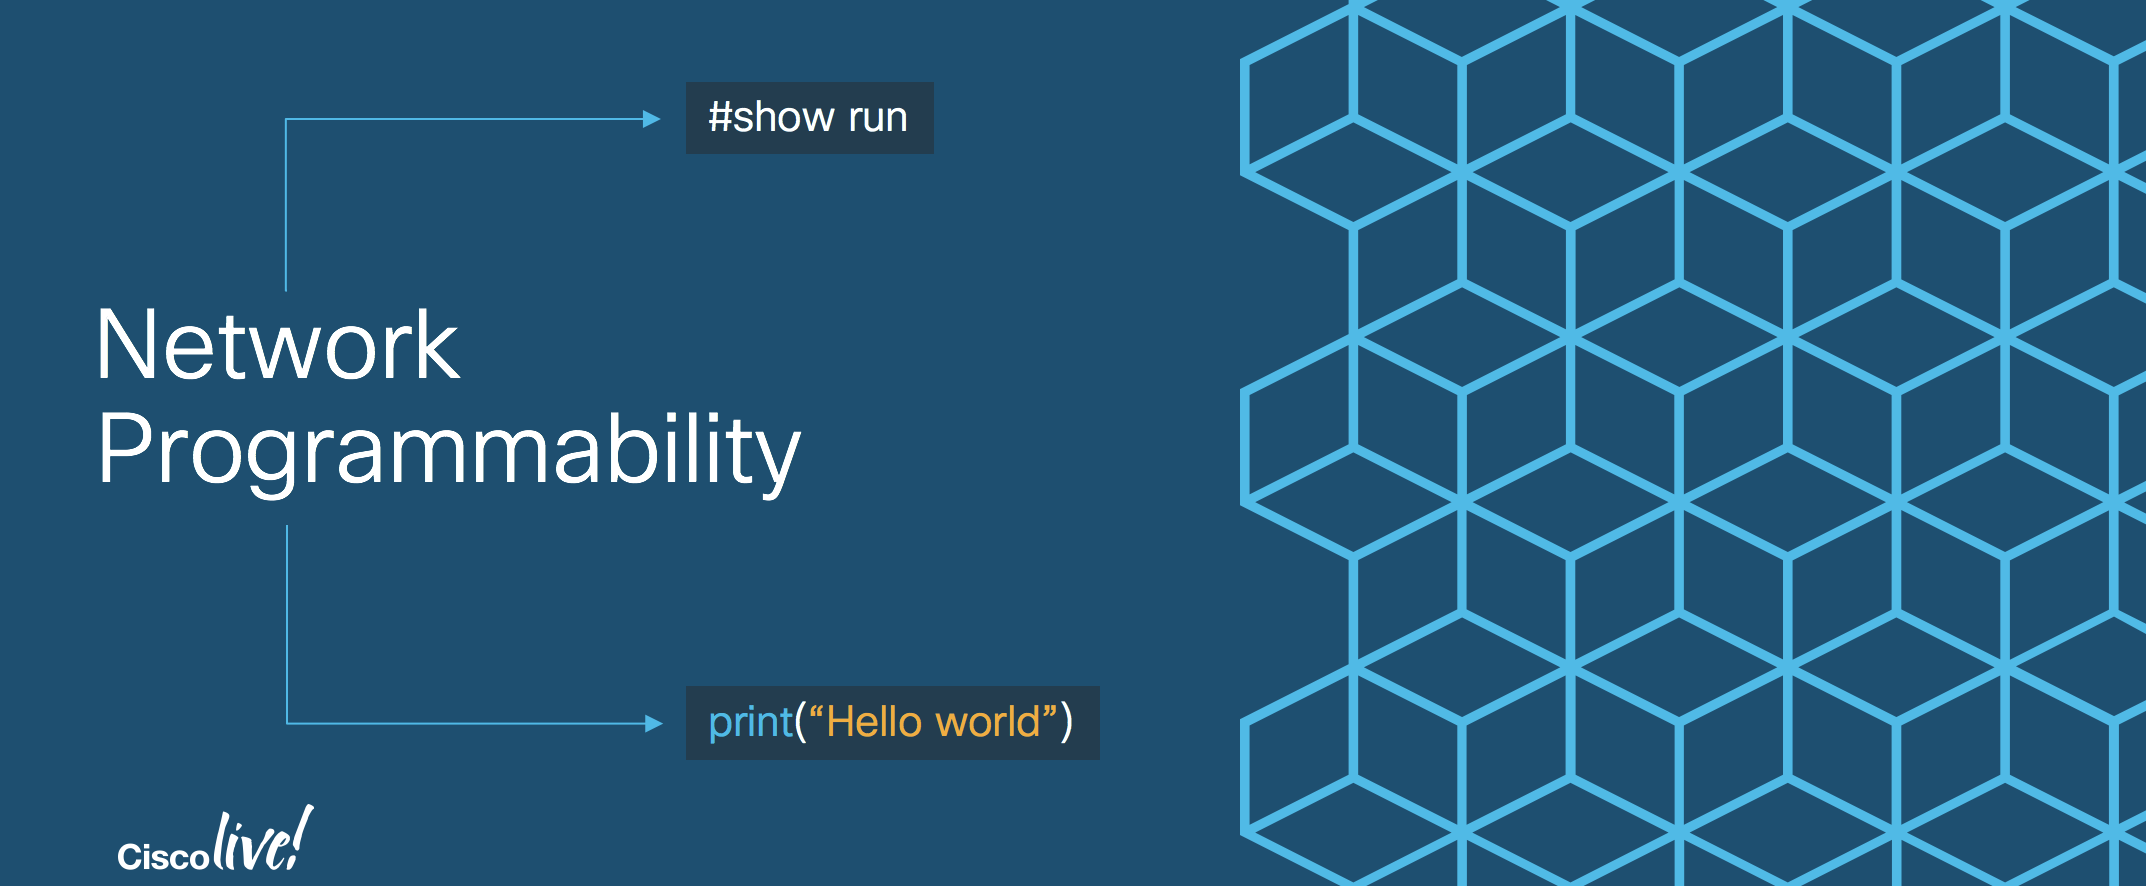

<center>In this Workshop we're going to automate the above-mentioned situation using Python scripting.</center><br><br>Although the exercise will be based only on 1 device (due to lack of computer's memory during virtualization) - it will allow you to get the general concept and re-use it on many devices simultaneously! 


**IMPORTANT: This LAB shows only an example of a Network Automation problem. But you can re-use all mechanisms existing here as per your need/scenario!**

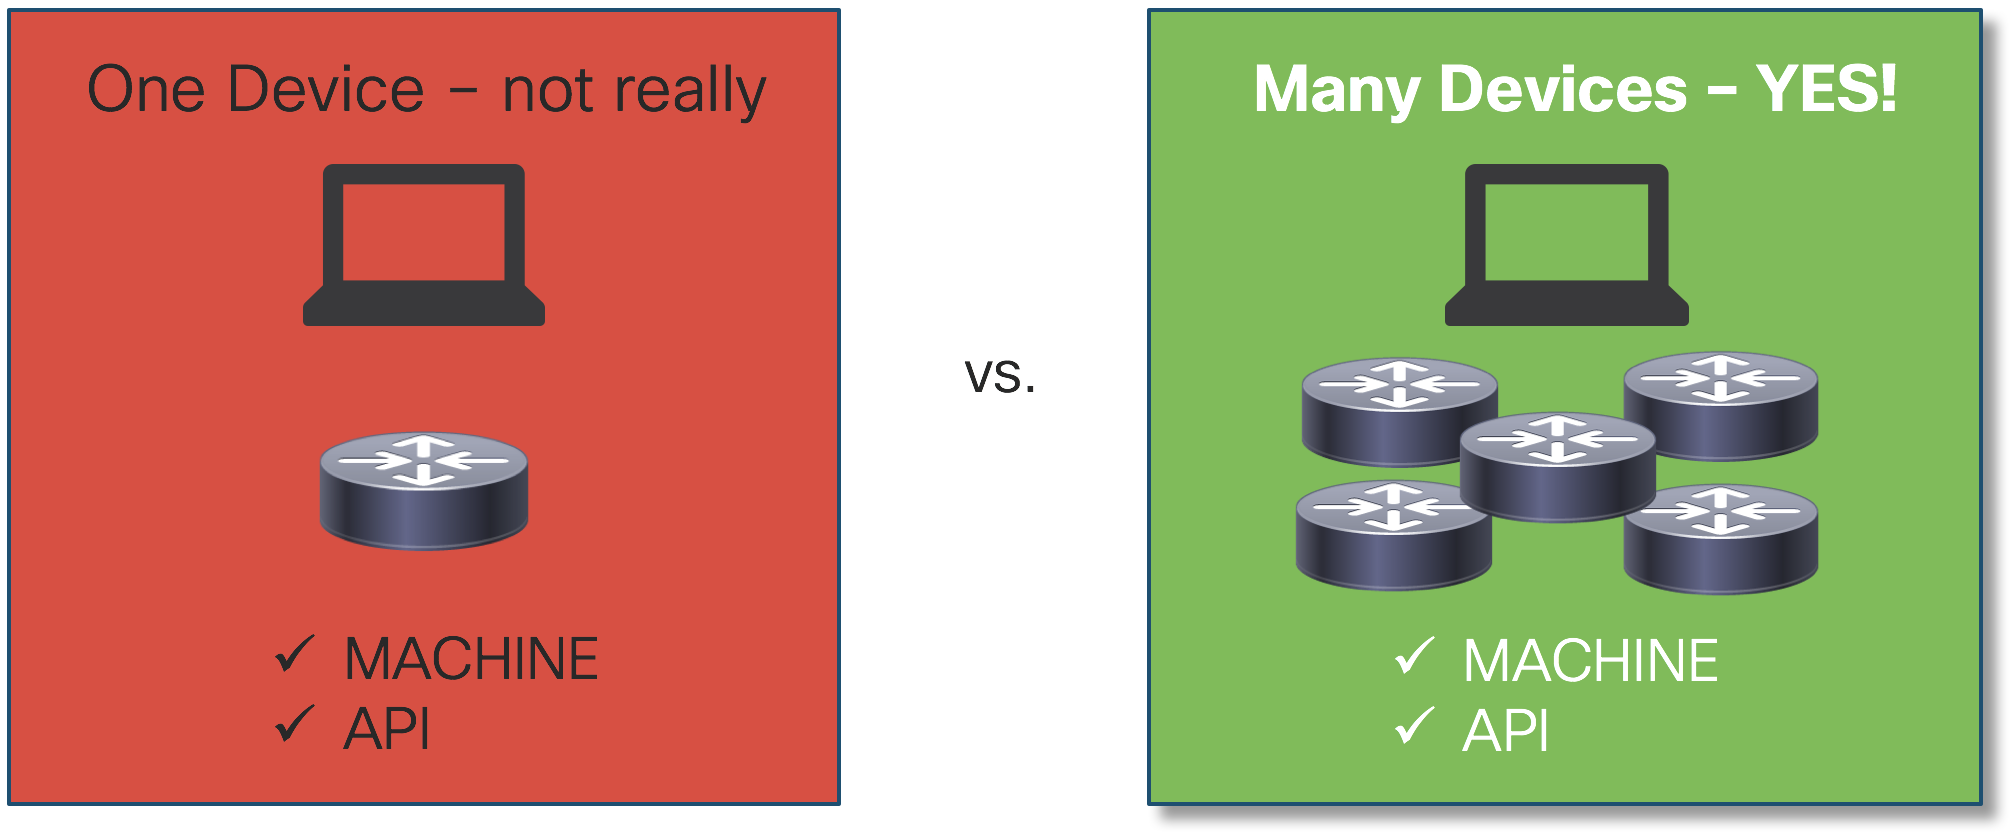

<div style="border-bottom: 1px solid #00bceb;border-top: 1px solid #00bceb;padding:4%;margin-top:-2%">
<div><font color='#005073'><h1><center>Workshop Agenda</center></h1></font></div>

<div><font color='white'><h2>Intro</h2></font></div>

<ol>
<div><font color='white'><h4>
<a href="#-1st-step---GET-DATA-"><li>Different ways of collecting data from network devices:</li></a>
<ul>
<a href="#Option-A.---Netmiko"><li> Netmiko </li></a> <br>
<a href="#Option-B.---NETCONF"><li> NETCONF </li></a> <br>
<a href="#Option-C.---RESTCONF"><li> RESTCONF </li></a> <br>
</ul>
</h4></font></div>
</ol>
<ol start="2">
<div><font color='white'><h4>
<a href="#-2nd-step---EXTRACT-DATA-"><li>Methods of extracting desired data</li></a> <br>
<a href="#-3rd-step---FILL-THE-SPREADSHEET-"><li>Creating a spreadsheet and filling it with data</li></a> <br>
<a href="#-4th-step---CHECK-&-UPDATE-CONFIG-"><li>Compliance check - box vs. spreadsheet</li></a> <br>
</h4></font></div>
</ol>
</div>


## Lab Instructions

Jupyter instructions contain two types of cells: Markdown and Code.
* **Markdown** - this is static content, like text and pictures. You **can't** interact with it.
* **Code** - this is an interactive cell which **can** be interacted with (run).<br> It is marked with 'In[ ]:' marker on a left.<br>To 'run' code cell press 'Shift+Enter' while the cell is selected (green border) or press 'Run' button in the menu bar (One code cell can be run many times)

This is a markdown cell!
It is static, you cant interact with it.

In [2]:
# This is code cell! You can interact with it by pressing 'Shift+Enter' or 'Run' button in the menu bar.
# Try it!
print("Cisco Live!!!")

Cisco Live!!!


If the **Code** cell has **In[ \* ]** on a left, it means that it's during the execution of the code. Always wait when the number appears here, for example **In[ 1 ]** - it will mean that the code has been executed.

<font style="color:red;"><center>**DISCLAIMER: You need to execute Code cells one by one! Otherwise, it won't work!**<center><font>

<hr style="opacity:0.5;height:2px;border:none;color:#00bceb;background-color:#00bceb;" />
<hr style="opacity:0.5;height:2px;border:none;color:#00bceb;background-color:#00bceb;" />

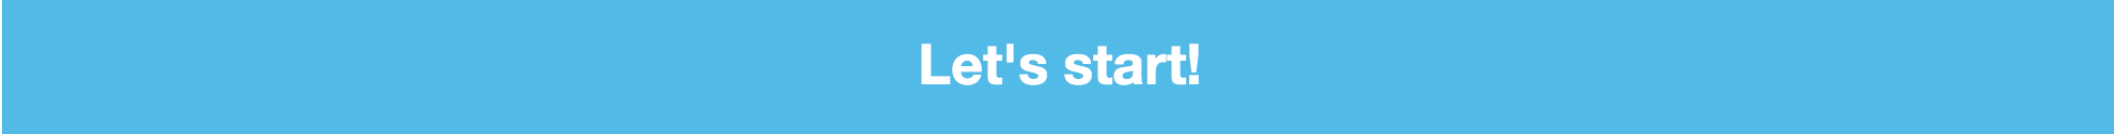

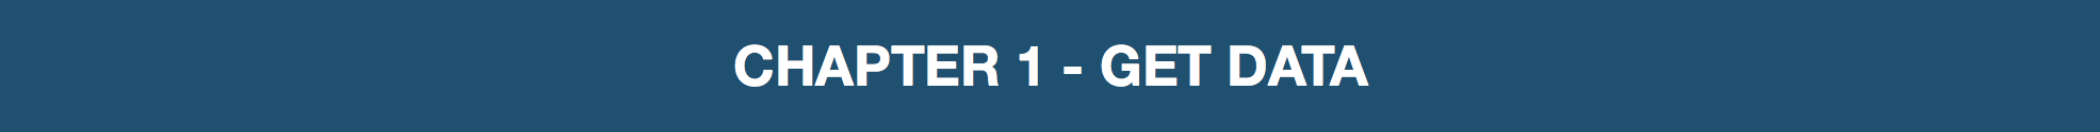

### Overview
In this chapter we're going to **gather configuration data from the device** using Python and:
- Option A. - Netmiko 
- Option B. - NETCONF
- Option C. - RESTCONF

# ► Option A. - Netmiko
Netmiko is a Python module written by Kirk Byers which allows to interact with a network device via SSH. 
It automatically handles prompt and provides simple API (Application Programming Interface) for the most common operations. <br>

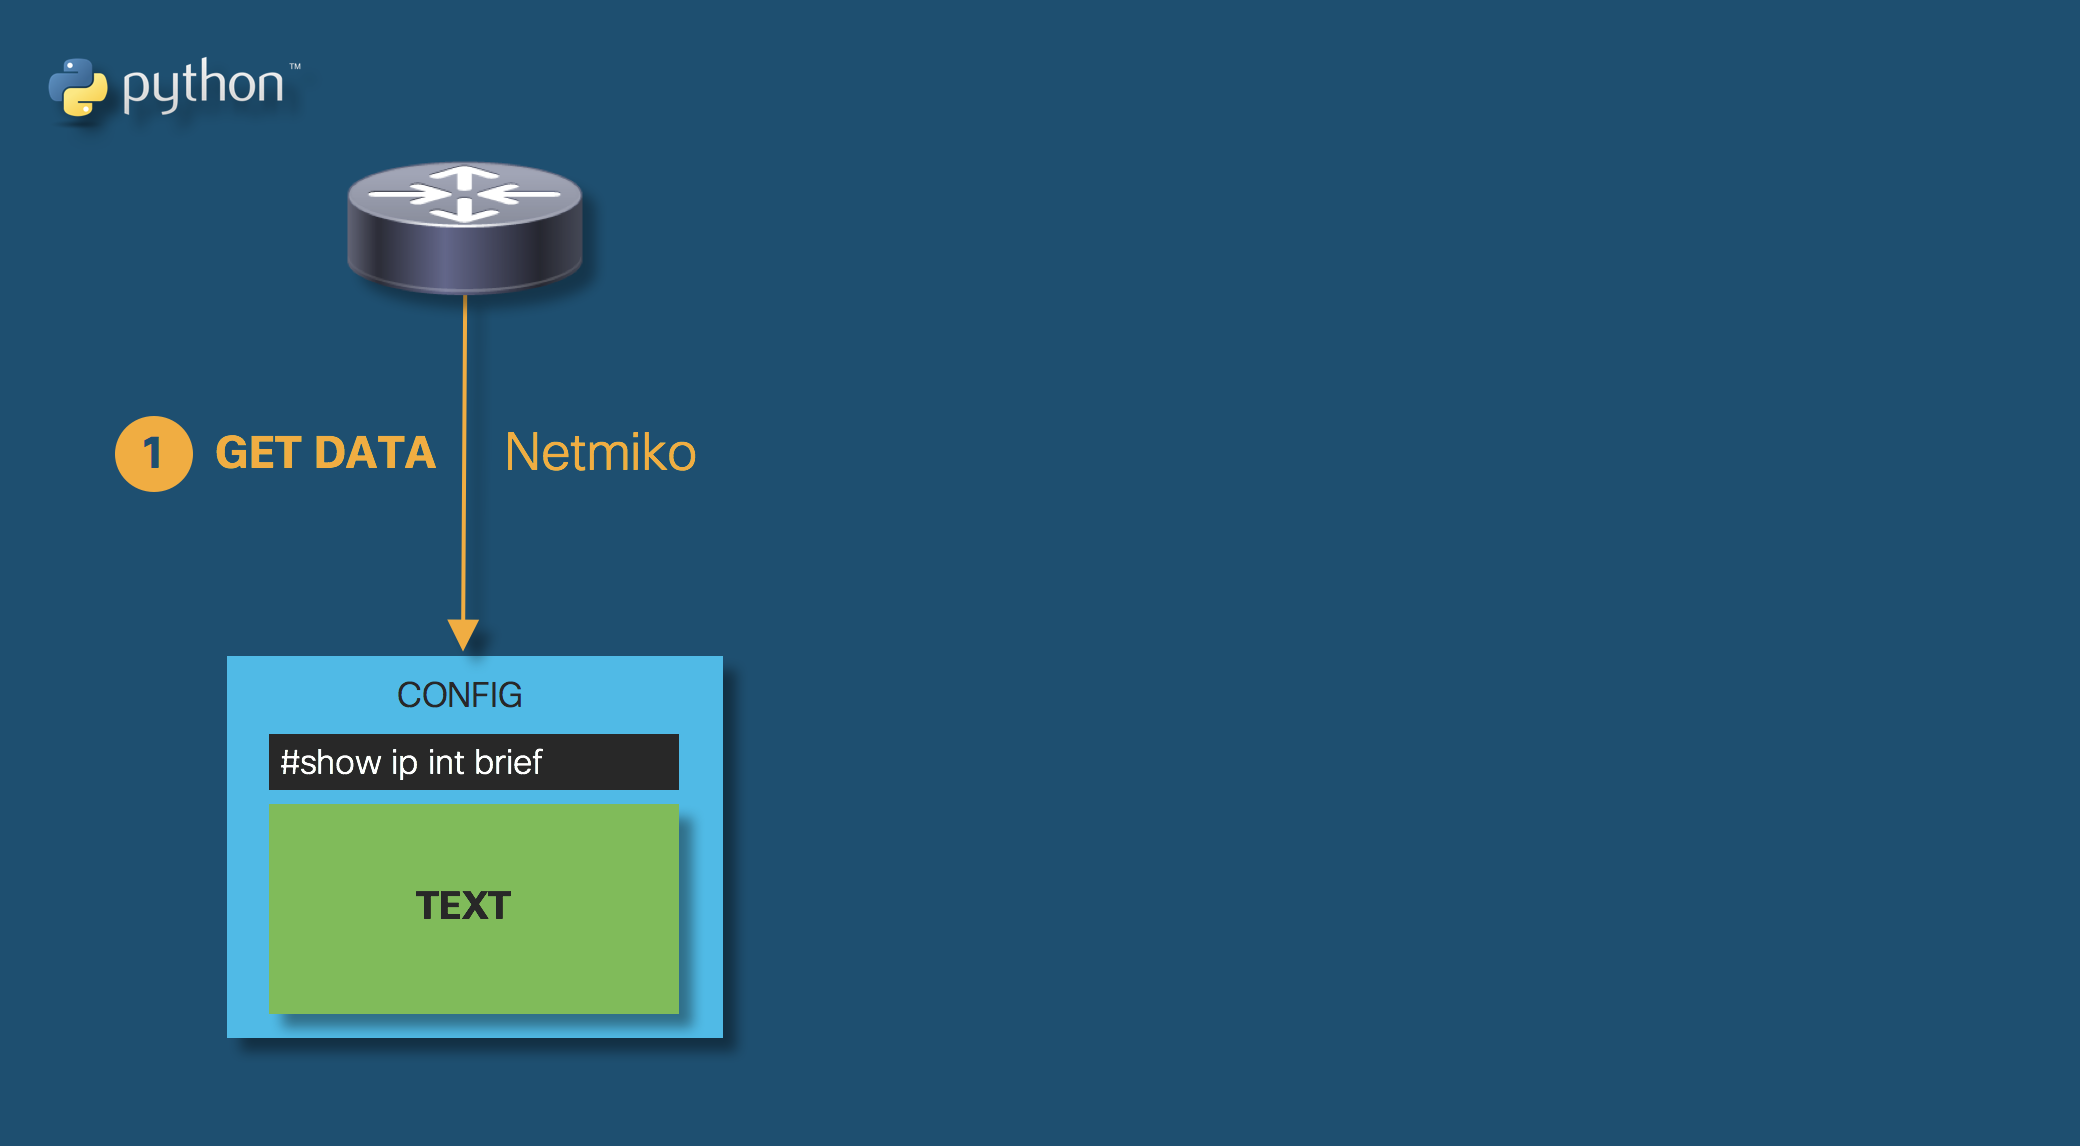

<b> Netmiko is not a protocol, it only provides a scripted way for the execution of CLI commands via SSH! </b>

Gathering #show commands manually from 1 device? - No issues! <br>But imagine that you need to SSH and collect a lot of #show commands from many devices - for this, you can write an easy Python script using for example Netmiko!

### Step 1: Import required Python modules

Let's start by importing the necessary Python modules.<br>
&#x21B3; A **module** is a file containing Python definitions and statements that were prepared to help with certain tasks. For example, the 'math' module contains loads of predefined mathematical functions and equations like log(), sin(), cos() etc.

In [7]:
from netmiko import ConnectHandler

#### Required Python modules:

* **netmiko** - from the Netmiko module we're going to import the ConnectHandler function to establish connectivity to the device

### Step 2: Define connection parameters and connect to the box

Let's call a Netmiko **ConnectHandler()** function with defined **connection parameters** of our device - it will allow us to establish a connection to this device.<br>

We're putting this in a **try-except** block. <br>
&#x21B3; Python try-except blocks = '**try** to execute everything in that block. In case of any failure - execute the contents of the **except** block'<br>
Why? - To gracefuly handle exceptions in case of any issues with the connection establishment 

In [ ]:
try:
    device_connection = ConnectHandler(
        device_type = 'cisco_ios',
        host = '10.10.20.48',
        username = 'developer',
        password = 'C1sco12345',
        secret = 'cisco'
    )
    print("Connected to the device!")
except:
    print("Failure...")

<b> Success! Connection to the device via SSH has been established! </b>

Now we got to this moment of the CLI interaction using Python:


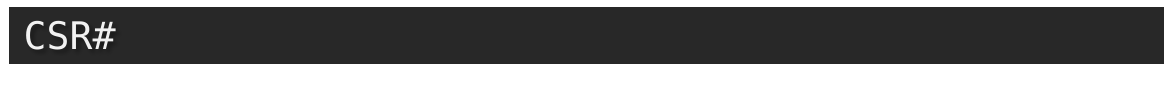

### Step 3: Get output

So now let's execute a CLI command to get some outputs. Use the **device_connection** established in the previous step and execute a CLI command, for example #show command, using the Netmiko **send_command()** function:

In [56]:
ssh_output = device_connection.send_command("show ip int br")

Print the output on the screen:

In [57]:
print(ssh_output)

Interface              IP-Address      OK? Method Status                Protocol
GigabitEthernet1       10.0.2.15       YES manual up                    up      
GigabitEthernet2       192.168.0.1     YES manual administratively down down    
GigabitEthernet3       192.168.1.1     YES manual administratively down down    
Loopback101            10.1.1.1        YES manual up                    up      
Loopback102            10.2.2.2        YES manual up                    up      
Loopback103            10.3.3.3        YES manual up                    up      
Loopback104            10.4.4.5        YES other  up                    up      


Great! You can see the output from the issued CLI command on our CSR - it is exactly the same result as we would get if we SSH manually to the box and type this command. <br>

<b> Play with this a little bit! Try to change the CLI command between the quotation marks, execute this code cell again and print the output! </b> <br>
<br>
<center>...</center>

You're done! Now, please gracefuly disconnect from the device:

In [10]:
device_connection.disconnect()

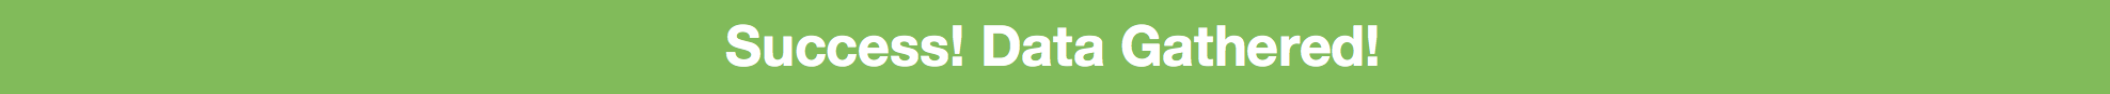

# ► Option B. - NETCONF
Now you know how to get data from the box using:<br>
✓ **Netmiko** Python library (simple SSH simulation)<br><br>
Netmiko is not the only good way to get data from the device. Now, let’s have a look on how to get it using the **NETCONF** protocol and **YANG Data models**.

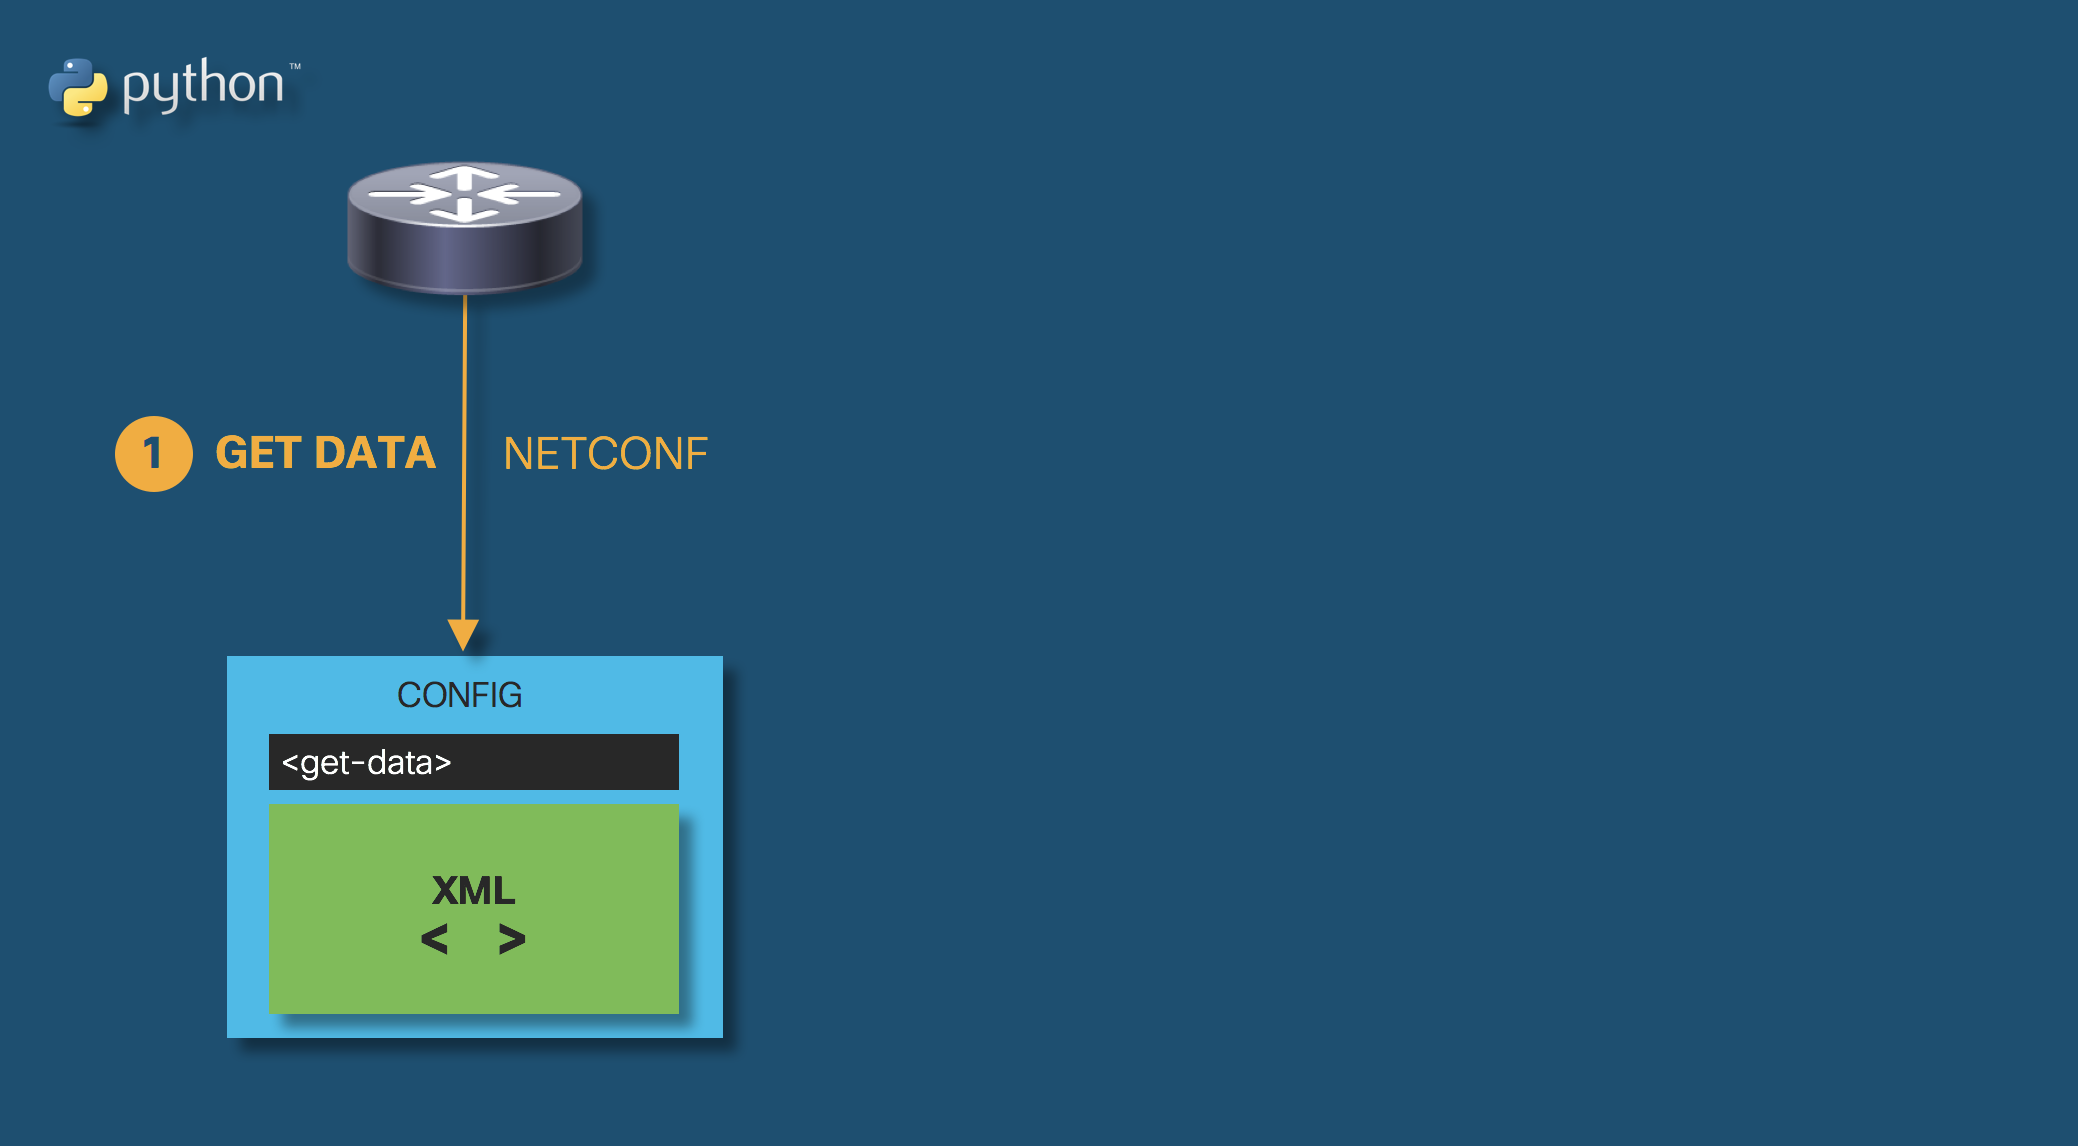

The **NETCONF** protocol provides mechanisms to perform *OPERATIONS* such as install (&lt;get&gt; and &lt;get-config&gt;), manipulate (&lt;edit-config&gt;), and delete (&lt;delete-config&gt;) the configuration of network devices. <br> To describe the *CONTENT* of the messages (configuration data and protocol messages), it uses an Extensible Markup Language **(XML)-based** data encoding. <br>The NETCONF protocol operations are realized as remote procedure calls **(RPCs)** *MESSAGES* which leverage on *TRANSPORT* **SSH** at the bottom (but this time via port **830**).

See below how the NETCONF stack and example message (getting the interface name) look like:<br>
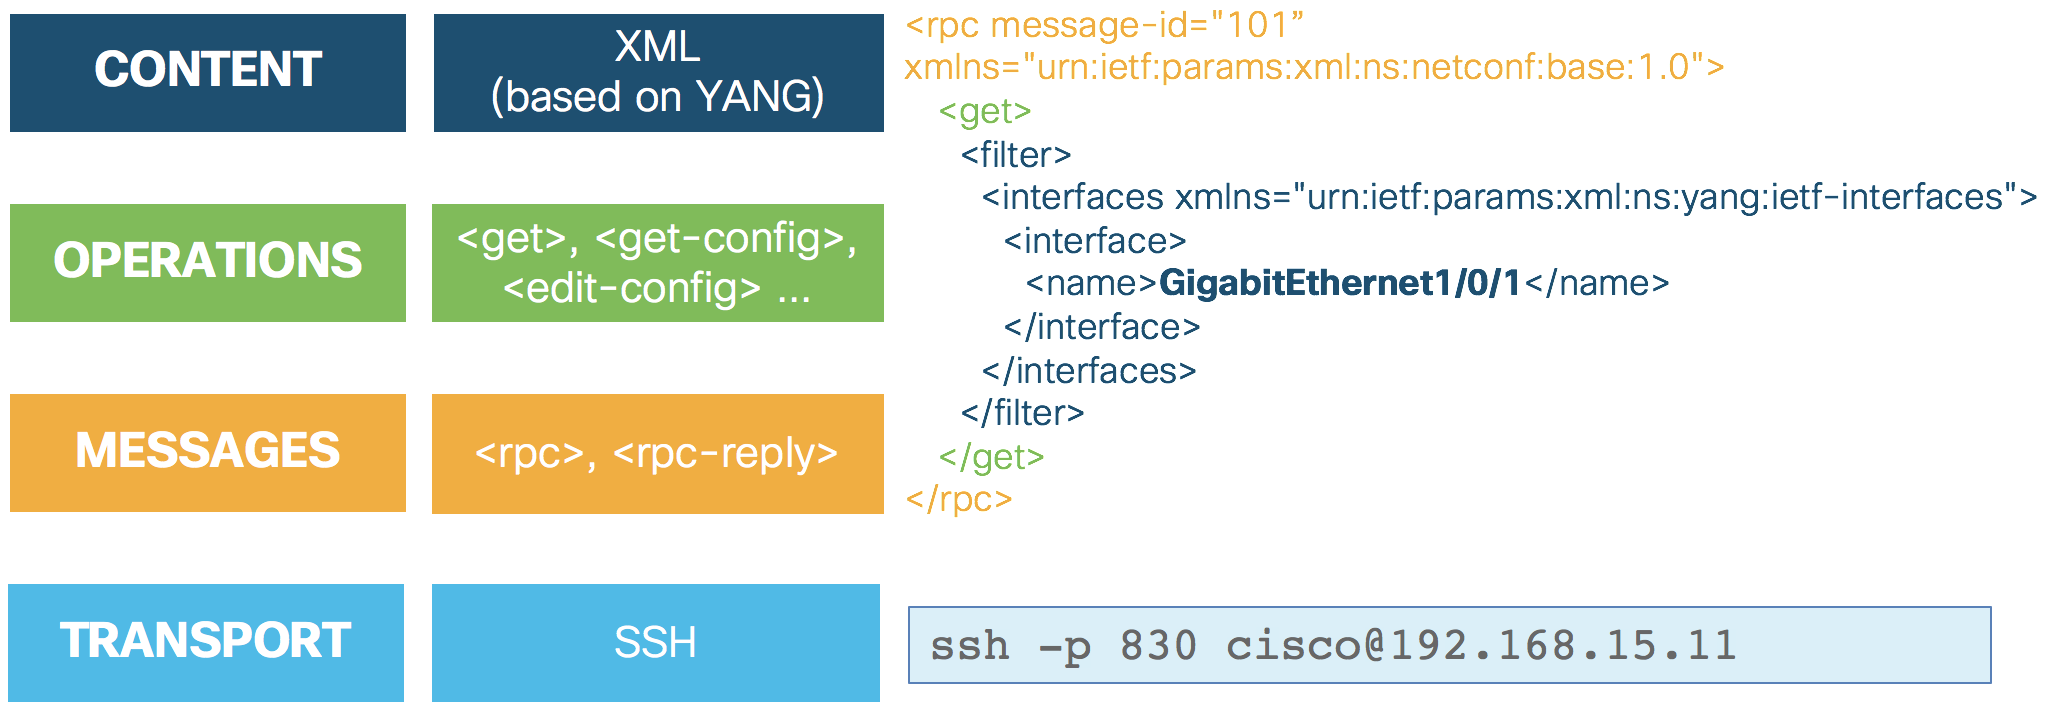

**Remember!**<br> NETCONF itself is only a **transport protocol**. To describe the CONTENT of the NETCONF Requests, we use specific Data Models **(YANG Data Models)**.

YANG definitions directly map to NETCONF (XML) content.

Each module is bound to a distinct XML namespace, which is a globally unique URI.

**Reasons why NETCONF is awesome in terms of Network Automation?**
- Scalability!
- Transactions (all or nothing!)
- Separation of configuration and operational data
- Validation of the configuration



### Step 1: Import required Python modules

Let's start by importing necessary Python modules:

In [15]:
import ncclient.manager
from ncclient.operations import TimeoutExpiredError
import xml.dom.minidom

#### Required Python modules:

* **ncclient** - Python library that facilitates scripting around the NETCONF protocol
* **xml.dom.minidom** - lightweight Python module to process XMLs

### Step 2: Define connection parameters and connect to the box

Let's call a built-in ncclient manager's **connect()** function with defined **connection parameters** of our device - it will establish a connection to this router.<br>

We're once again putting this in a Python **try-except** block structure to gracefuly handle exceptions in case of any issues with the connection establishment.

In [16]:
try:
    device_connection = ncclient.manager.connect(
        host = '10.10.20.48',
        username = 'developer',
        password = 'C1sco12345',
        port = '830',
        device_params = {'name':"csr"}
    )
    print("Connected to the device!")
except:
    print("Failure...")

Connected to the device!


Success! Connection to the device via NETCONF protocol has been established! 

### Step 3: Get output

So, let’s specify what we want to filter from the whole running configuration, using special **&lt;filter&gt;** tags. <br>In this example, we only want to get **interfaces** information:

In [17]:
interfaces_filter = '''
    <filter>
        <interfaces xmlns="urn:ietf:params:xml:ns:yang:ietf-interfaces">
           <interface></interface>
        </interfaces>
    </filter>
'''

Execute **NETCONF Request (&lt;get-config&gt;)** on a **running** configuration with a specified **filter** using previously defined **device_connection** and ncclient **get_config()** function:

In [18]:
netconf_output = device_connection.get_config('running', interfaces_filter)

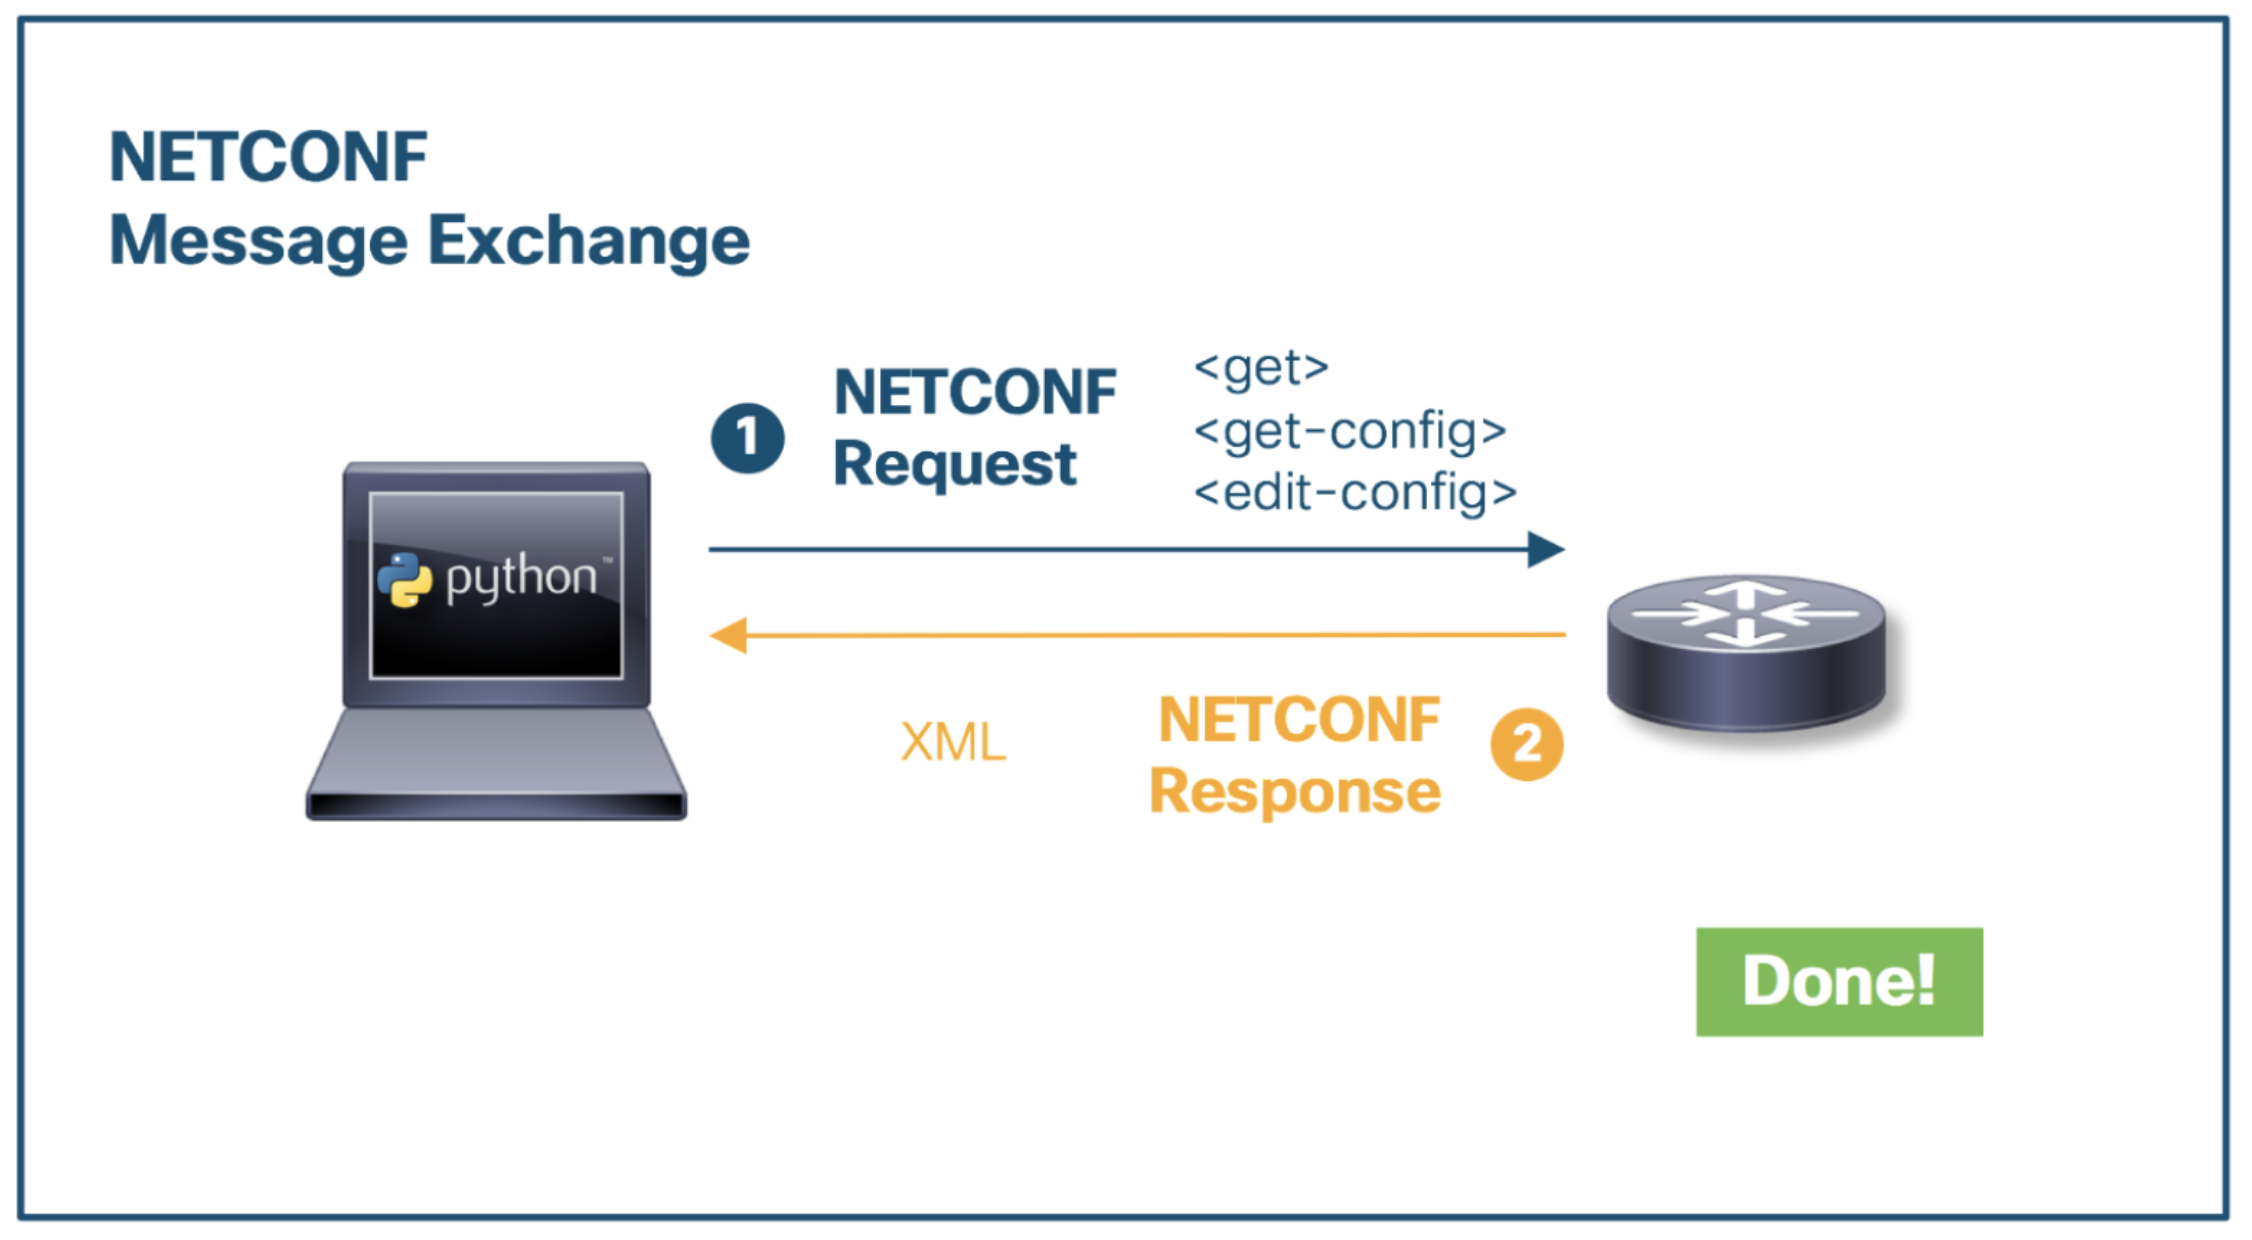

And print the received **NETCONF Response** in an original **XML** format:

In [19]:
print(netconf_output)

<?xml version="1.0" encoding="UTF-8"?>
<rpc-reply xmlns="urn:ietf:params:xml:ns:netconf:base:1.0" message-id="urn:uuid:bee36287-d28f-43d3-88be-379147835de6" xmlns:nc="urn:ietf:params:xml:ns:netconf:base:1.0"><data><interfaces xmlns="urn:ietf:params:xml:ns:yang:ietf-interfaces"><interface><name>GigabitEthernet1</name><type xmlns:ianaift="urn:ietf:params:xml:ns:yang:iana-if-type">ianaift:ethernetCsmacd</type><enabled>true</enabled><ipv4 xmlns="urn:ietf:params:xml:ns:yang:ietf-ip"><address><ip>10.0.2.15</ip><netmask>255.255.255.0</netmask></address></ipv4><ipv6 xmlns="urn:ietf:params:xml:ns:yang:ietf-ip"></ipv6></interface><interface><name>GigabitEthernet2</name><type xmlns:ianaift="urn:ietf:params:xml:ns:yang:iana-if-type">ianaift:ethernetCsmacd</type><enabled>false</enabled><ipv4 xmlns="urn:ietf:params:xml:ns:yang:ietf-ip"><address><ip>192.168.0.1</ip><netmask>255.255.255.0</netmask></address></ipv4><ipv6 xmlns="urn:ietf:params:xml:ns:yang:ietf-ip"></ipv6></interface><interface><name>Gi

Congratulations, you received the data! But wait... uhh... It doesn't look good. 

Let's try to show it in a much cleaner way to see the structure. We will use **xml.dom.minidom** module to pretty print it:

In [20]:
netconf_output_pretty = xml.dom.minidom.parseString(netconf_output.xml).toprettyxml()

Now let's print this pretty formed result:

In [21]:
print(netconf_output_pretty)

<?xml version="1.0" ?>
<rpc-reply xmlns="urn:ietf:params:xml:ns:netconf:base:1.0" xmlns:nc="urn:ietf:params:xml:ns:netconf:base:1.0" message-id="urn:uuid:bee36287-d28f-43d3-88be-379147835de6">
	<data>
		<interfaces xmlns="urn:ietf:params:xml:ns:yang:ietf-interfaces">
			<interface>
				<name>GigabitEthernet1</name>
				<type xmlns:ianaift="urn:ietf:params:xml:ns:yang:iana-if-type">ianaift:ethernetCsmacd</type>
				<enabled>true</enabled>
				<ipv4 xmlns="urn:ietf:params:xml:ns:yang:ietf-ip">
					<address>
						<ip>10.0.2.15</ip>
						<netmask>255.255.255.0</netmask>
					</address>
				</ipv4>
				<ipv6 xmlns="urn:ietf:params:xml:ns:yang:ietf-ip"/>
			</interface>
			<interface>
				<name>GigabitEthernet2</name>
				<type xmlns:ianaift="urn:ietf:params:xml:ns:yang:iana-if-type">ianaift:ethernetCsmacd</type>
				<enabled>false</enabled>
				<ipv4 xmlns="urn:ietf:params:xml:ns:yang:ietf-ip">
					<address>
						<ip>192.168.0.1</ip>
						<netmask>255.255.255.0</netmask>
					</addres

Success! Here you can see the whole structure of received Data via NETCONF protocol based on YANG Data Models.

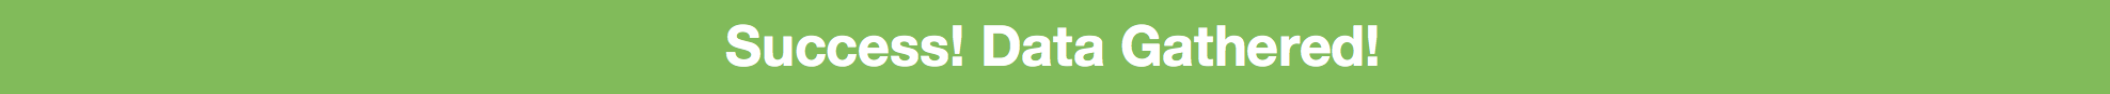

# ► Option C. - RESTCONF
Now you know how to get data from the box using:<br>
&#10003; **Netmiko** Python library (simple SSH simulation)<br>
&#10003; **NETCONF** and YANG Data Models. 

Now, let’s have a **REST**... see how we can get data from the box using **RESTCONF**!

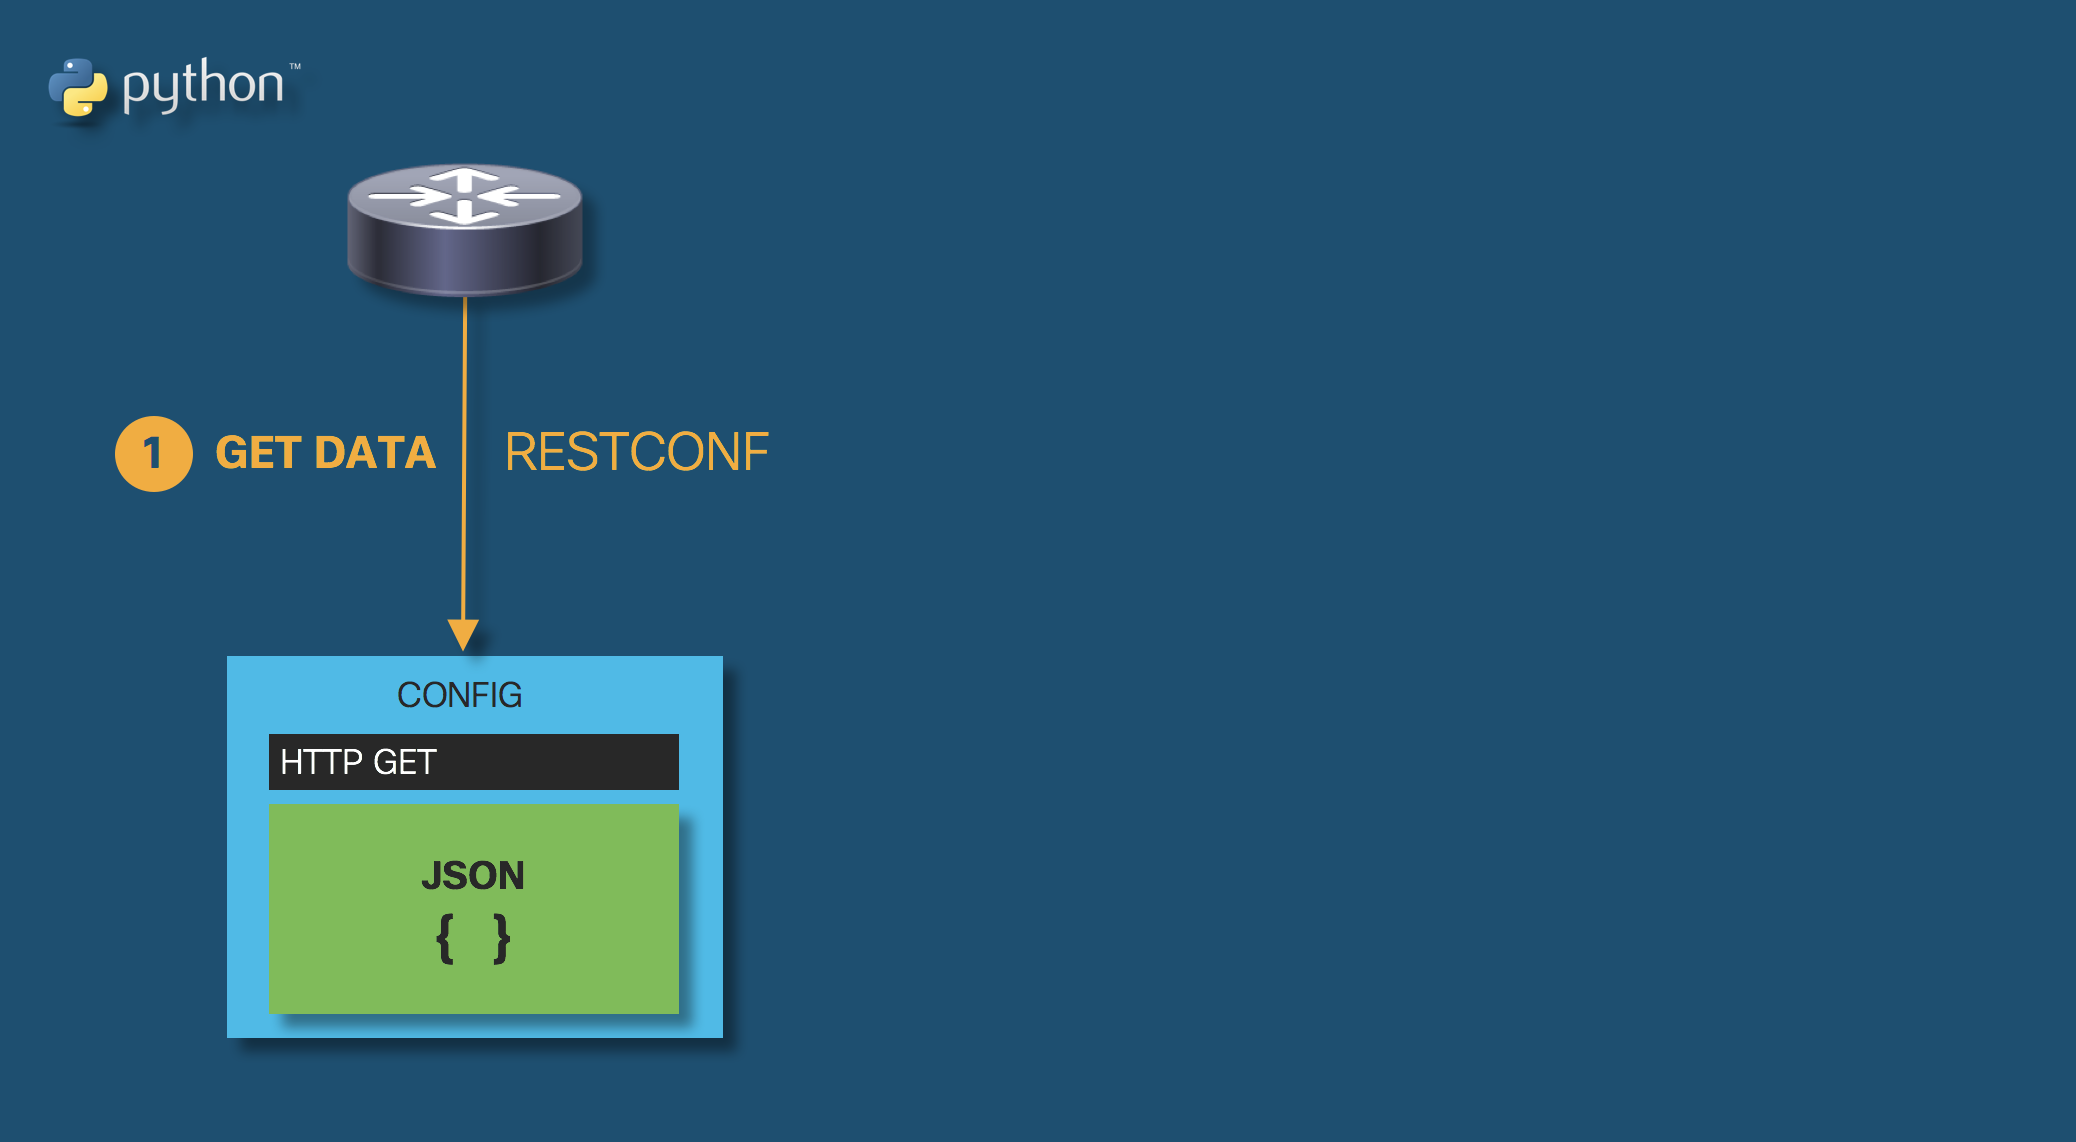

**RESTCONF** is a newly specified protocol which also leverages on YANG Data Models (same as NETCONF). <br>
**RESTCONF** is not intended to replace NETCONF, but rather to provide an
**HTTP** interface that follows Representational State Transfer **(REST)**
principles and is compatible with the NETCONF  datastore model.

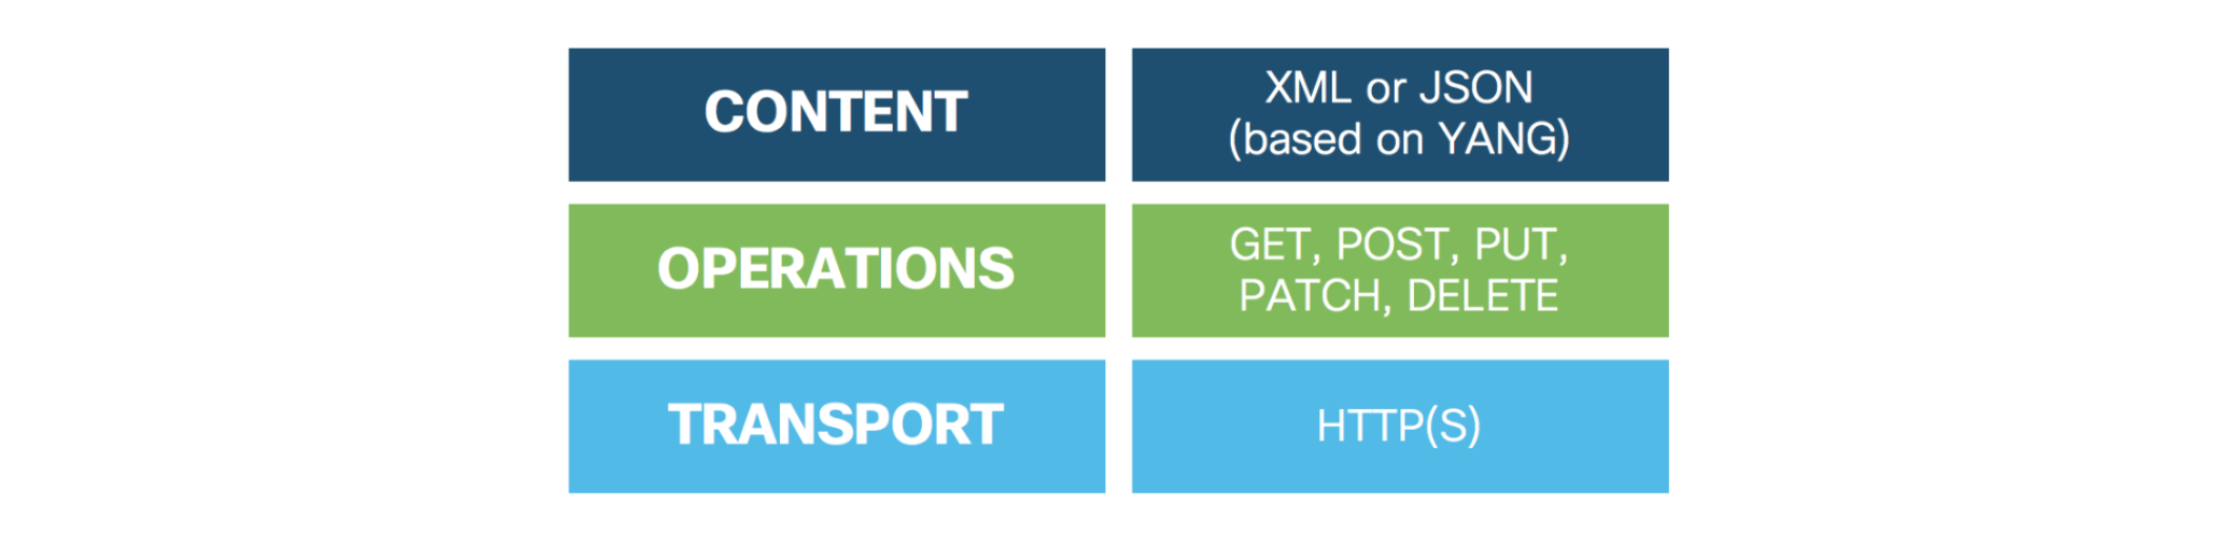

**REST** - **RE**presentational <b>S</b>tate <b>T</b>ransfer
- GET - gets a resource
- POST - creates a resource or invoke operation
- PUT - replaces a resource
- DELETE - removes a resource

The HTTP POST, PUT, PATCH, and DELETE methods are used to edit data
resources represented by YANG data models.  These basic edit
operations allow the running configuration to be altered by a
RESTCONF client.

So what differentiates RESTCONF from NETCONF?
- no more SSH, now HTTP(S)
- no more connection establishment, now only requests
- no more XML, now XML and JSON

### Step 1: Import required Python modules

Let's start by importing necessary Python modules:

In [22]:
import requests

#### Required Python modules:

* **requests** - simple Python module which allows to execute HTTP Requests based on REST

### Step 2:  Define request parameters and send it to the box

Let’s define **request** (not connection!) parameters (YES! RESTCONF is **connectionless**) to get data from our CSR.<br>
First of all, specify the **URI** to which we want to send a HTTP request based on the CSR parameters and YANG models:

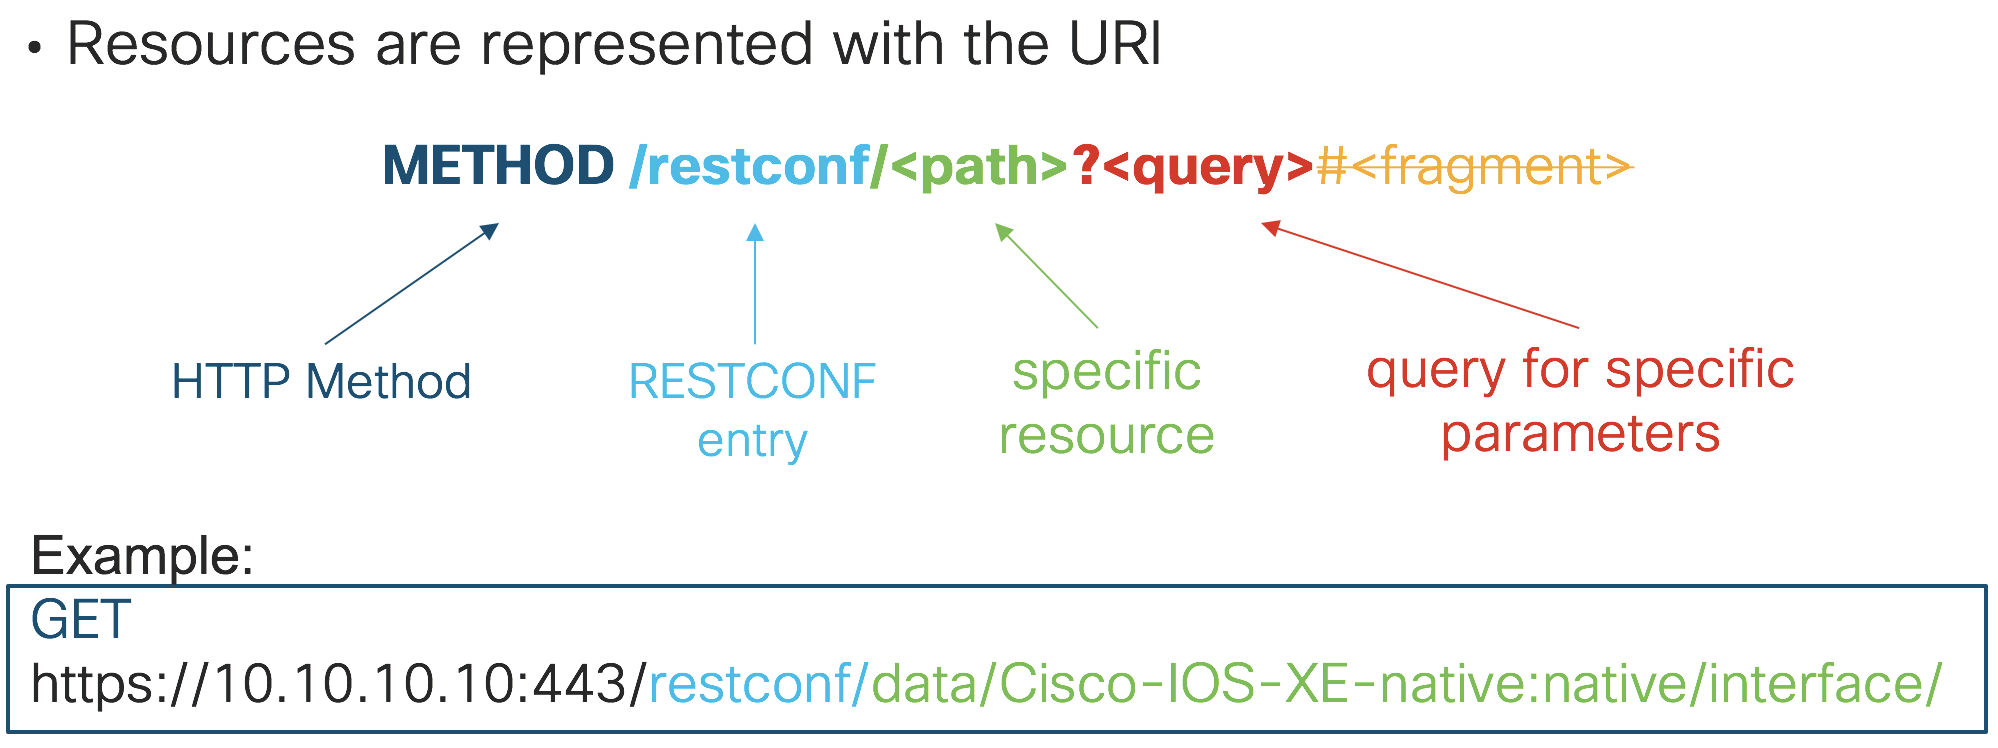

In [23]:
url = "https://10.10.20.48:443/restconf/data/Cisco-IOS-XE-native:native/interface/"

Specify **headers** with the type of data that we're sending and accepting in response:

In [24]:
headers = {'Content-Type': 'application/yang-data+json',
            'Accept': 'application/yang-data+json'} 

### Step 3: Get output

**It's simple as accessing the website!** - You send a request to get specific resources and the server is responding to you with the data

To gather data specified in the url, use the **requests** Python module and call its **get()** function to execute **HTTP Request** using **GET** method:

In [25]:
response = requests.get(url, auth=('developer', 'C1sco12345'), headers=headers, verify=False)

/usr/local/lib/python3.9/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Print the received **HTTP Response**:

In [26]:
print(response.text)

{
  "Cisco-IOS-XE-native:interface": {
    "GigabitEthernet": [
      {
        "name": "1",
        "ip": {
          "address": {
            "primary": {
              "address": "10.0.2.15",
              "mask": "255.255.255.0"
            }
          }
        },
        "mop": {
          "enabled": false,
          "sysid": false
        },
        "Cisco-IOS-XE-ethernet:negotiation": {
          "auto": true
        }
      },
      {
        "name": "2",
        "shutdown": [null],
        "ip": {
          "address": {
            "primary": {
              "address": "192.168.0.1",
              "mask": "255.255.255.0"
            }
          }
        },
        "mop": {
          "enabled": false,
          "sysid": false
        },
        "Cisco-IOS-XE-ethernet:negotiation": {
          "auto": true
        }
      },
      {
        "name": "3",
        "shutdown": [null],
        "ip": {
          "address": {
            "primary": {
              "address": "192.168

Do you see it?! The structure looks really good!

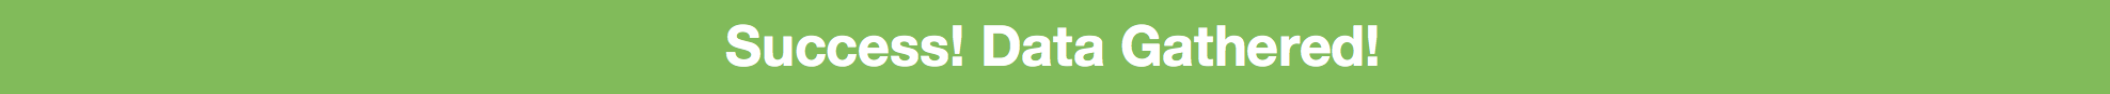

When you have the choice, NETCONF should be used for network elements configuration, while RESTCONF might be fine as the north-bound interface of the orchestrator or/and controller.

<hr style="opacity:0.5;height:1px;border:none;color:#005073;background-color:#005073;" />

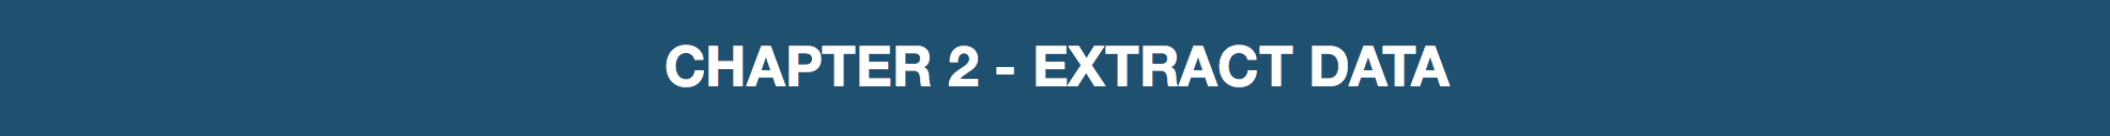

### Overview
In this chapter we are going to take configuration data gathered from the 1st chapter Option B. using **NETCONF** protocol and:<br>
* **extract** only purely necessary **information**<br>
* create a specific **Python data structure** <br>
* **fill the structure** with extracted information

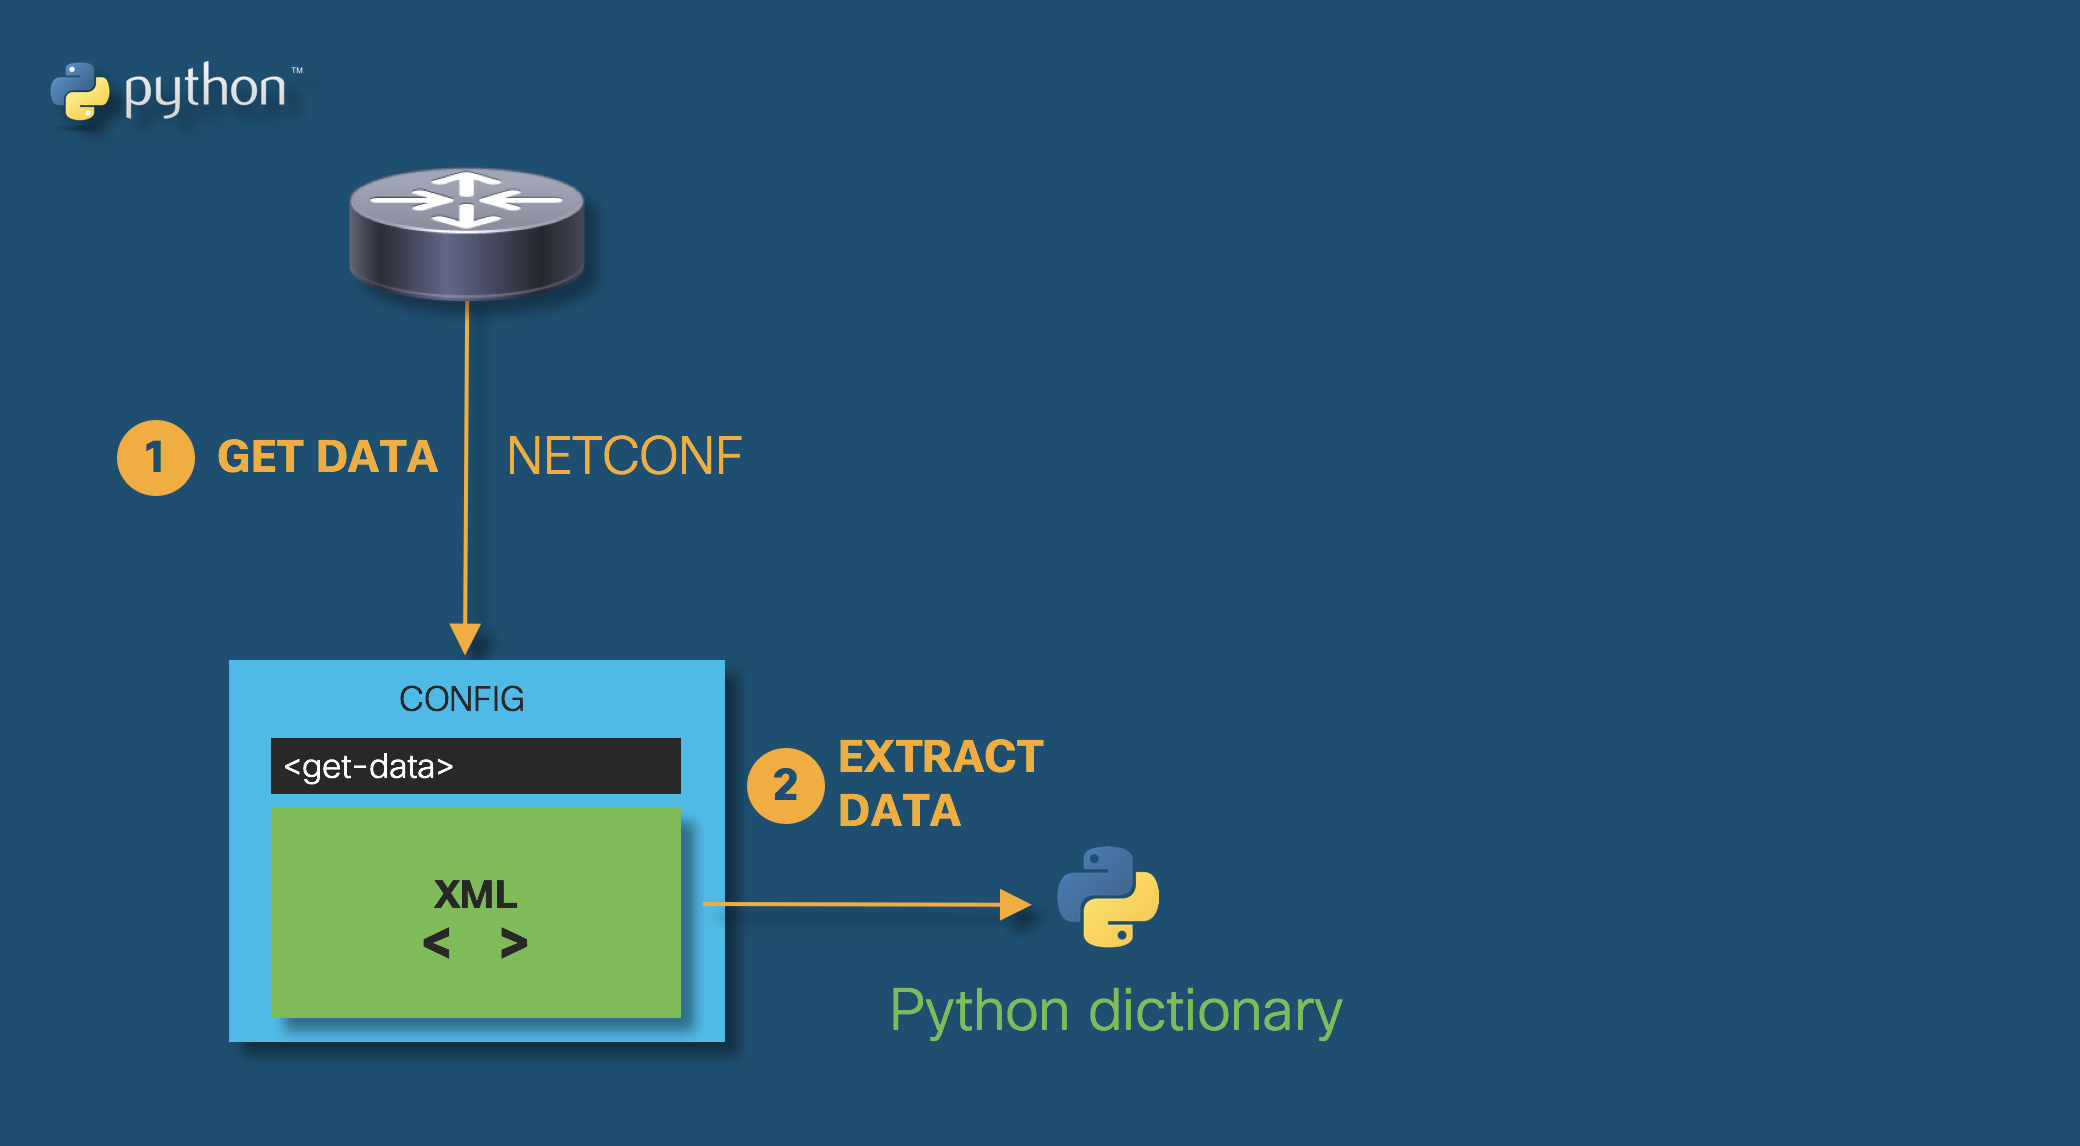

### How to extract values from the XML?
First we need to **extract values from the XML!**<br> Unfortunately, Python is not processing XML tags within its code easily... That's why to achieve this - we will use something called **XPath**.<br>

**XPath (XML Path Language)** - it's an expression which uses a path notation, like those used in URLs, for addressing parts of an XML document.<br><br>For example, the expression *data:name* will return a node-set of the *&lt;name&gt;* elements contained in the *&lt;data&gt;* elements, if such elements are declared in the source XML document. To receive not node-set but the value between specific tags append the XPath **text()** function at the end.

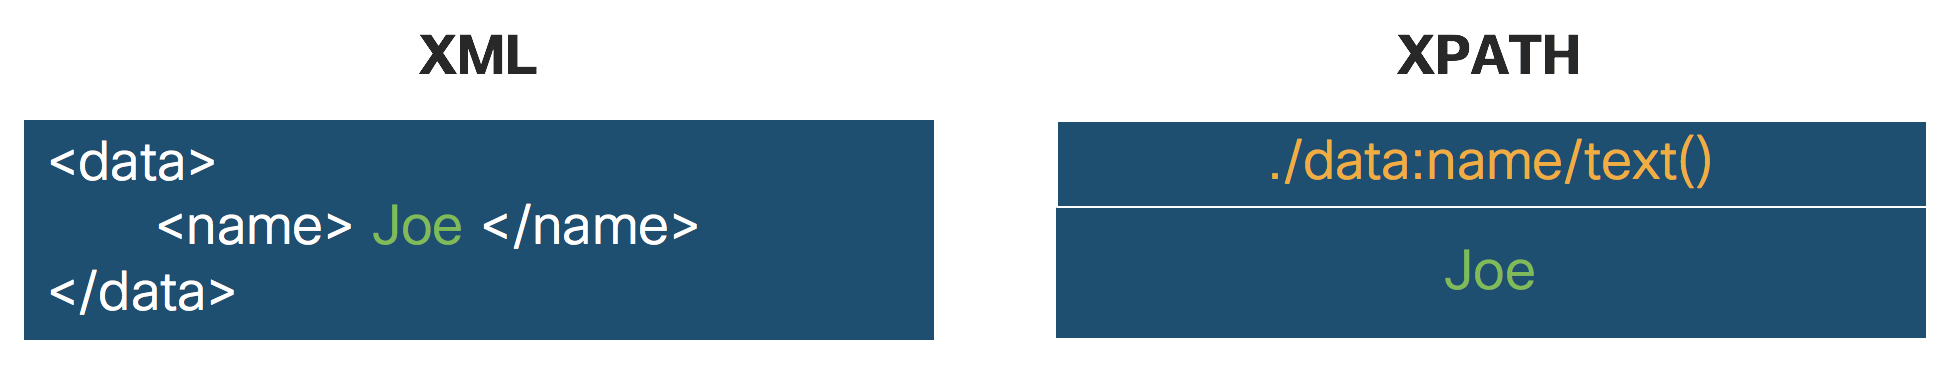

XPath also supports namespaces! Namespace prefixes can be included in expressions so that the matching operations can check for specific namespace prefixes.<br><br>
Then we want to create a specific structure and fill it with extracted information.

### How to structurize the data?
The most famous Python data structure is a **dictionary**. <br>
Python dictionaries are sets of ***'key' : 'value'*** pairs, separated by commas and all embraced with pairs of braces **{}**.  

After the values extraction from the NETCONF XML string (which we have gathered from the previous chapter), we want to fill them into the newly created Python dictionary as follows:

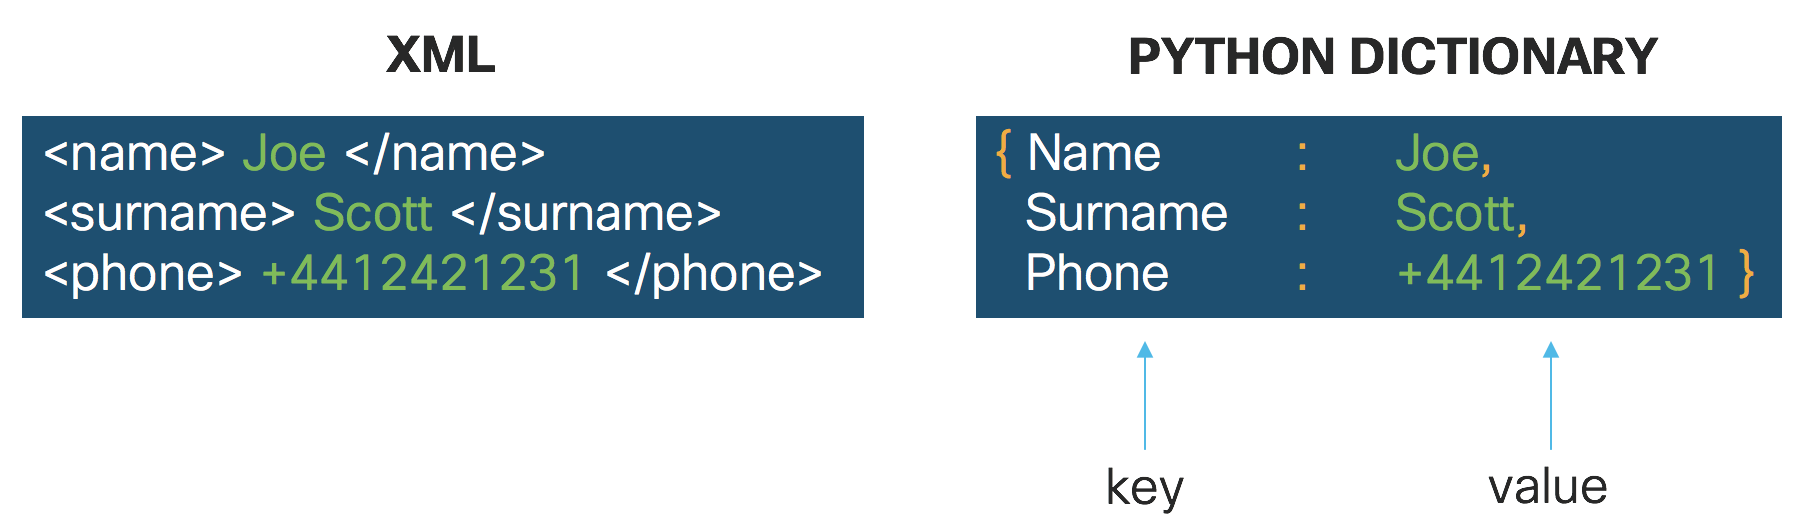

It will then allow us to easily operate on this Python structured data! Trust me, you will see that it's worth to do it! :)

### Step 1: Import required Python modules
Let's start by importing the necessary Python modules:

In [27]:
import pprint

### Step 2:  Define structures
Let’s first **define** the **main structure** where we will add **all the CSR interfaces** data:

In [28]:
discovery = []

Let's then **define substructures** which will describe a **single CSR interface** (Interface Name, IP address and Subnet Mask):

In [29]:
interface_name = []
ip = []
mask = []

The main discovery structure will consist of multiple (as many as the number of interfaces) substructures including an Interface Name, IP address and Subnet Mask.

### Step 3:  Search for interfaces namespace
Let’s use the Python **findall()** function to find **ietf-interfaces** namespaces in our NETCONF Response output (the amount of this namespace occurences should be same as the number of existing interfaces on the device):

In [30]:
interfaces_namespace = 'urn:ietf:params:xml:ns:yang:ietf-interfaces'
interfaces = netconf_output.data.findall(".//{%s}interface" % interfaces_namespace)

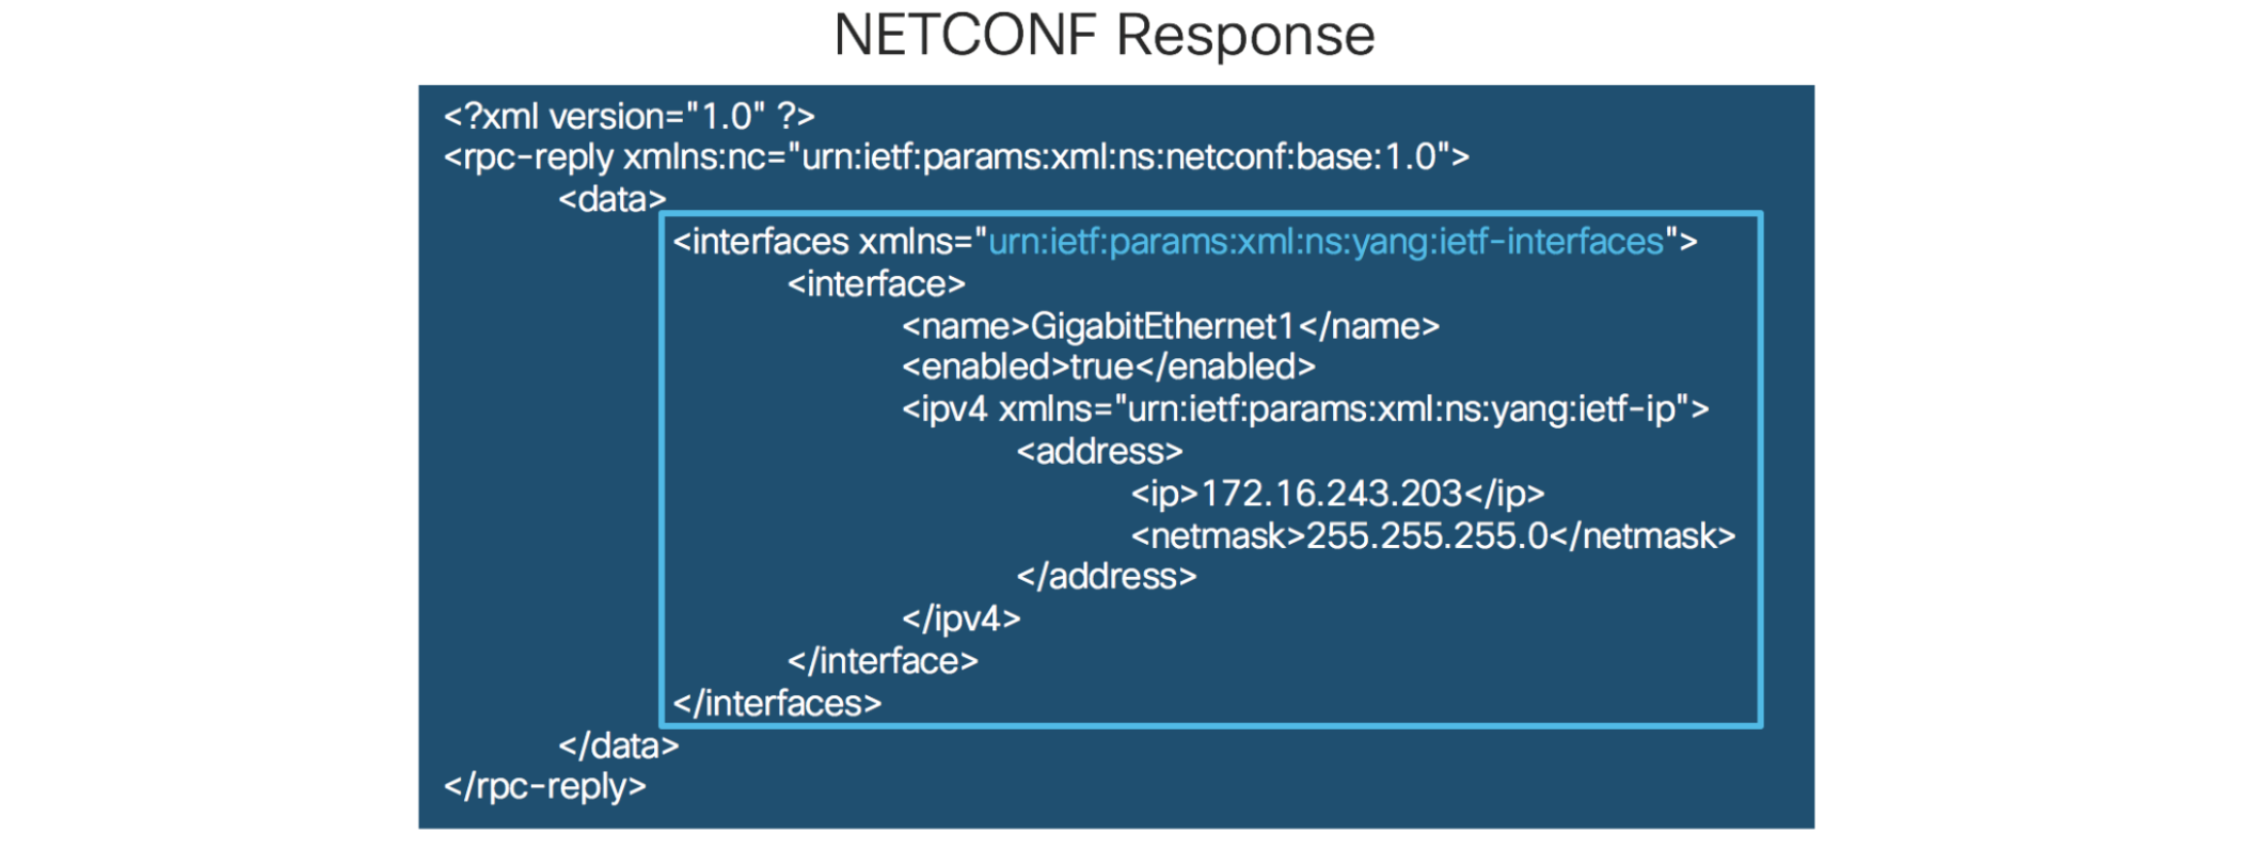

### Step 4:  Extract interfaces data
Let’s loop through that all **interfaces** data and search for the XML **&lt;name&gt;** tag using XPath. <br>Use the **XPath text()** function to get this tag content - so the **name** of particular interface.<br> Then use the **Python append()** function to fill each interface in our structure with this parameter:

In [31]:
for interface in interfaces:
    interface_name.append(interface.xpath('./namespace:name/text()', namespaces = dict(namespace = interfaces_namespace)))
    counter = len(interface_name)-1
    entry = {'Hostname': 'CSR', 'Interface': interface_name[counter][0], 'IP': '-', 'Mask': '-'}
    discovery.append(entry)

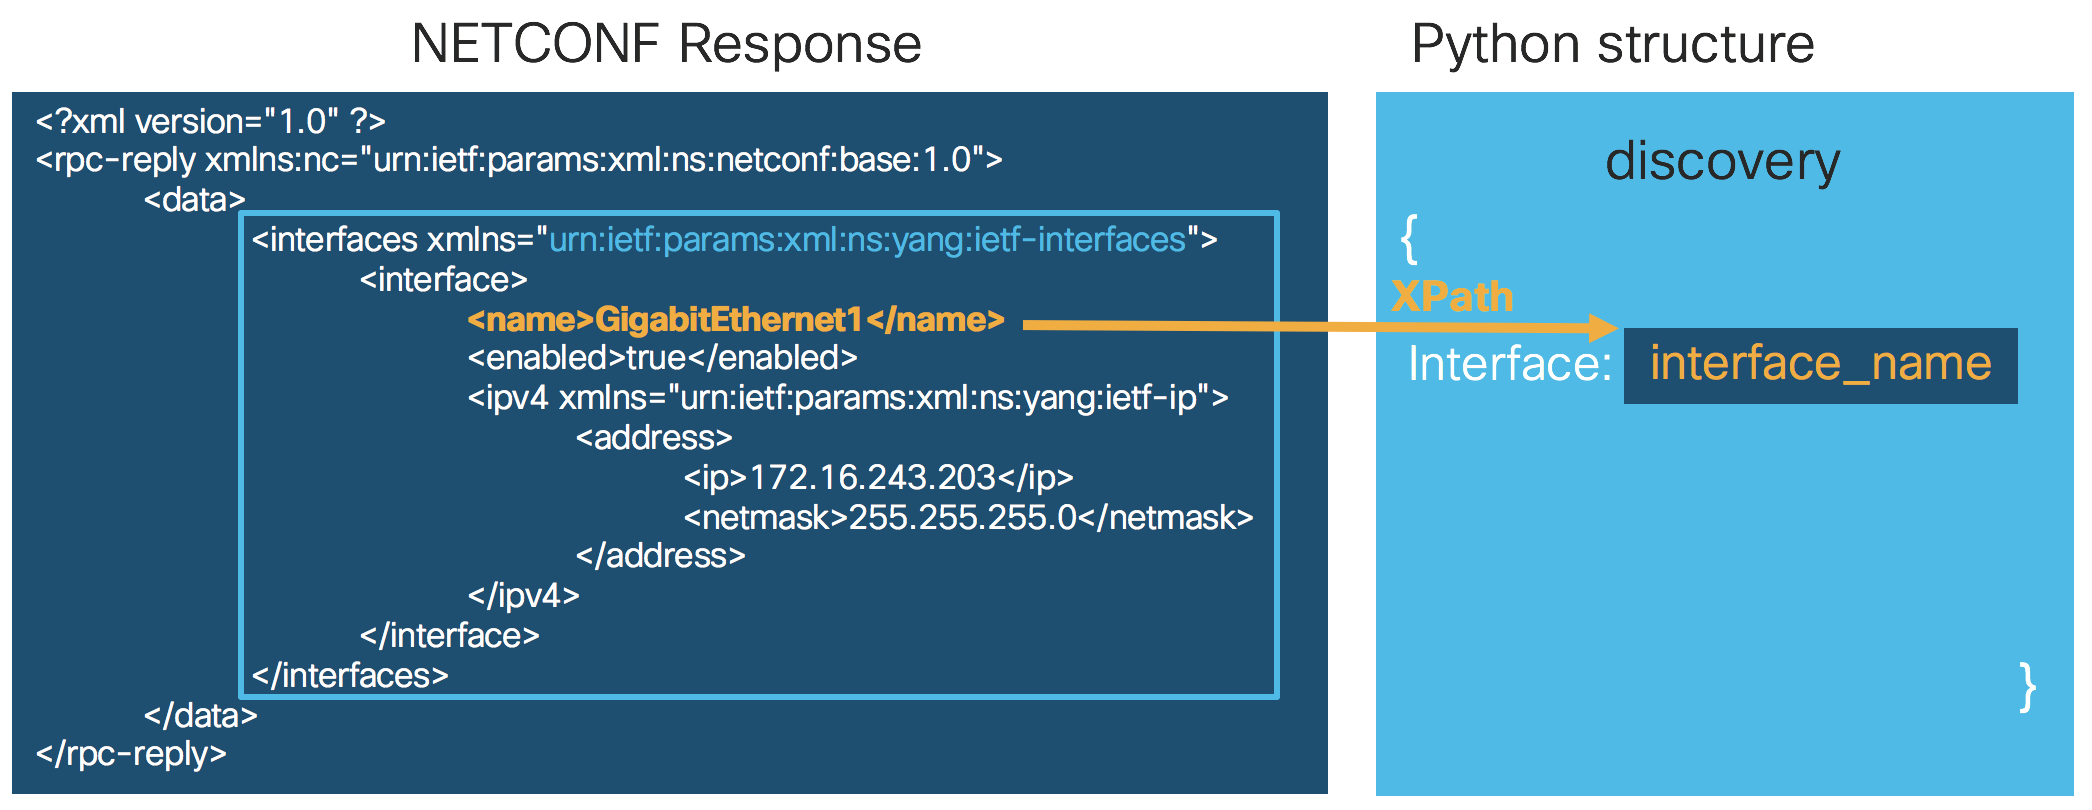

Check if our main **discovery** structure has been filled with Interfaces Names:

In [32]:
pprint.pprint(discovery)

[{'Hostname': 'CSR', 'IP': '-', 'Interface': 'GigabitEthernet1', 'Mask': '-'},
 {'Hostname': 'CSR', 'IP': '-', 'Interface': 'GigabitEthernet2', 'Mask': '-'},
 {'Hostname': 'CSR', 'IP': '-', 'Interface': 'GigabitEthernet3', 'Mask': '-'},
 {'Hostname': 'CSR', 'IP': '-', 'Interface': 'Loopback101', 'Mask': '-'},
 {'Hostname': 'CSR', 'IP': '-', 'Interface': 'Loopback102', 'Mask': '-'},
 {'Hostname': 'CSR', 'IP': '-', 'Interface': 'Loopback103', 'Mask': '-'},
 {'Hostname': 'CSR', 'IP': '-', 'Interface': 'Loopback104', 'Mask': '-'}]


Success! Now it's time to get inside of each interface to gather each one of their IP address and Mask in the same way!

### Step 5:  Search for ip namespace
Let’s use the Python **findall()** function again, this time to find **ietf-ip** namespaces in our NETCONF output:

In [33]:
ip_namespace = 'urn:ietf:params:xml:ns:yang:ietf-ip'
addresses = netconf_output.data.findall(".//{%s}address" % ip_namespace)

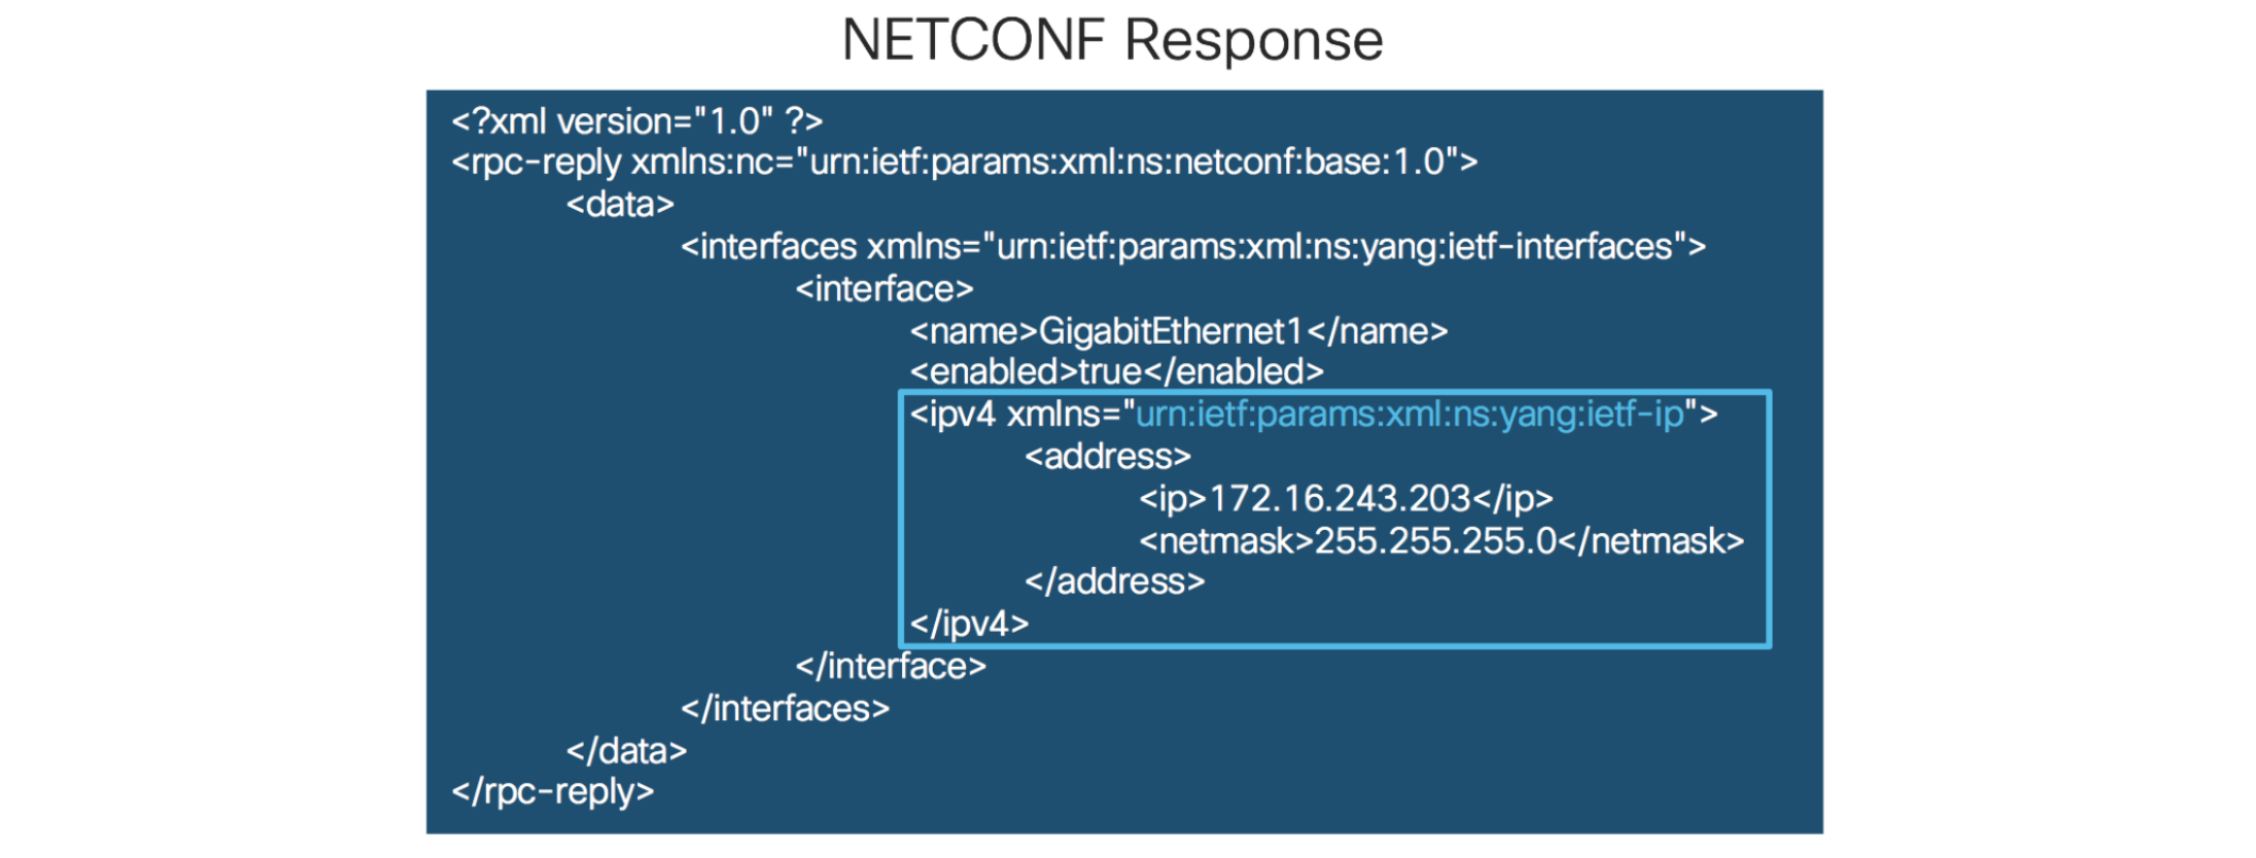

### Step 6:  Extract ip data
Let’s loop through that **ip** data and search for the **&lt;ip&gt;** and **&lt;netmask&gt;** tags using XPath. <br> Use the **XPath text()** function to get these tags' content - so **IP address** and **Mask** of particular interface. <br> Then update our structure with these parameters:

In [34]:
for address in addresses:
    ip.append(address.xpath('./namespace:ip/text()', namespaces = dict(namespace = ip_namespace)))
    mask.append(address.xpath('./namespace:netmask/text()', namespaces = dict(namespace = ip_namespace)))
    counter = len(ip)-1
    discovery[counter] = {'Hostname': 'CSR', 'Interface':interface_name[counter][0], 'IP':ip[counter][0], 'Mask':mask[counter][0]}

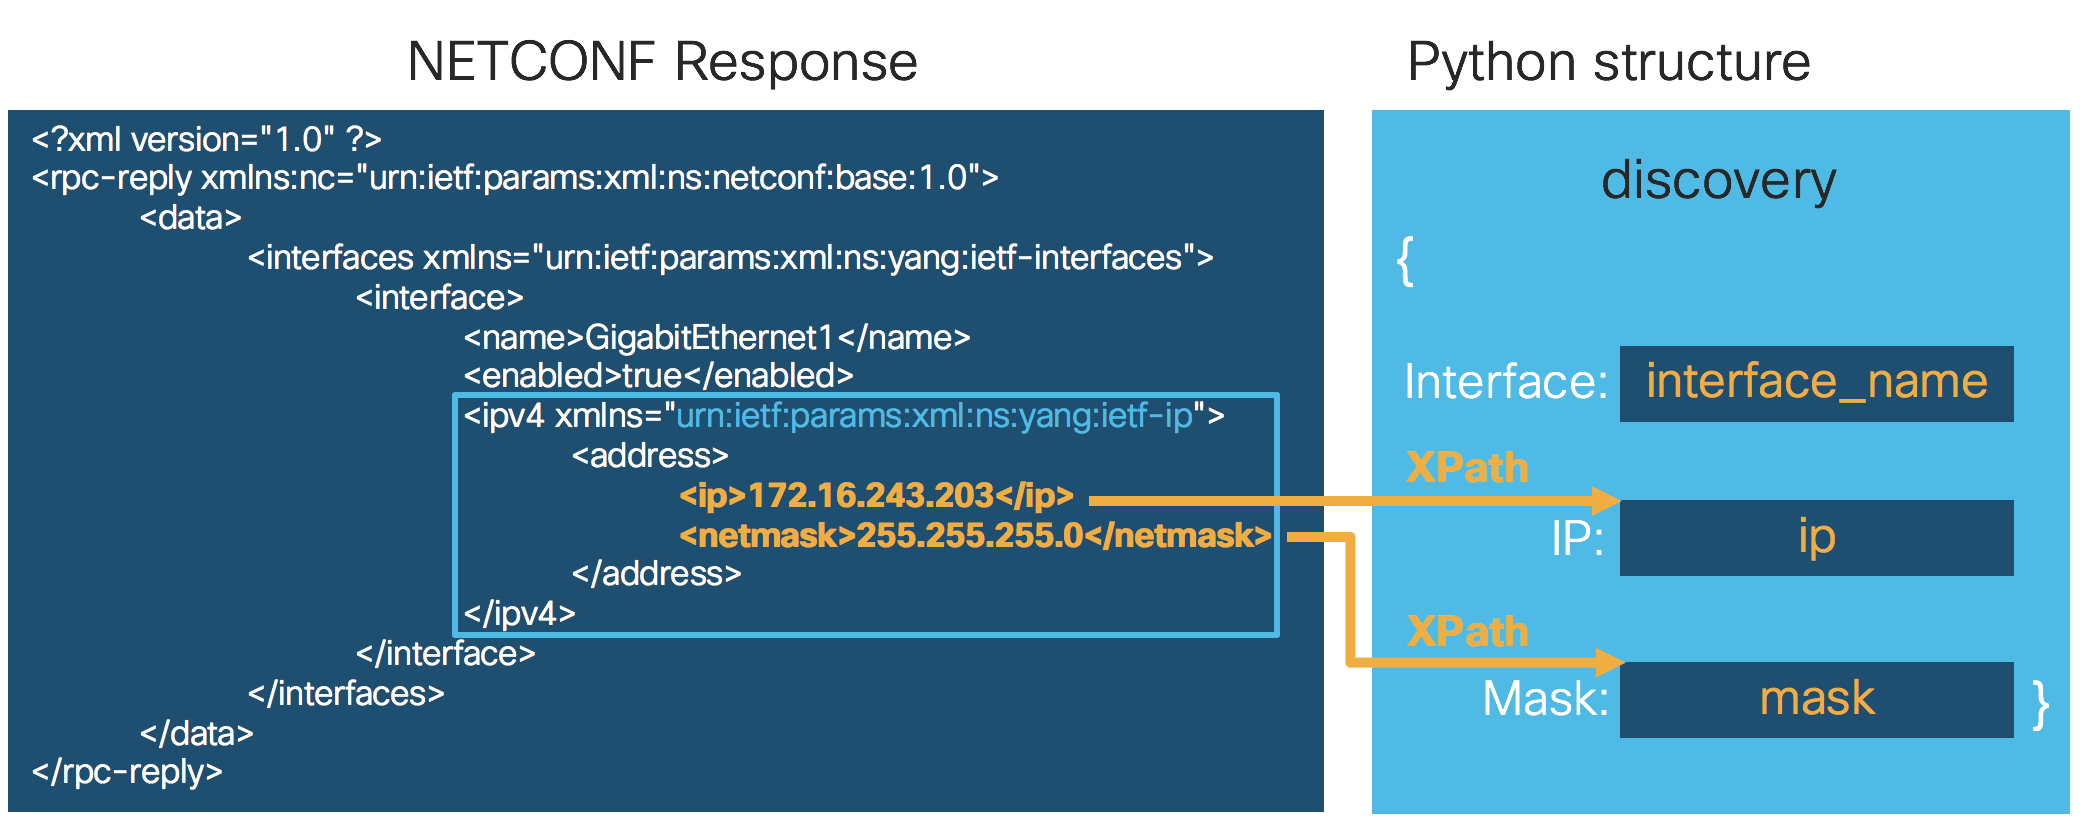

### Step 7:  Show filled structure
Pretty-print our structure filled with data:

In [35]:
pprint.pprint(discovery)

[{'Hostname': 'CSR',
  'IP': '10.0.2.15',
  'Interface': 'GigabitEthernet1',
  'Mask': '255.255.255.0'},
 {'Hostname': 'CSR',
  'IP': '192.168.0.1',
  'Interface': 'GigabitEthernet2',
  'Mask': '255.255.255.0'},
 {'Hostname': 'CSR',
  'IP': '192.168.1.1',
  'Interface': 'GigabitEthernet3',
  'Mask': '255.255.255.0'},
 {'Hostname': 'CSR',
  'IP': '10.1.1.1',
  'Interface': 'Loopback101',
  'Mask': '255.255.255.0'},
 {'Hostname': 'CSR',
  'IP': '10.2.2.2',
  'Interface': 'Loopback102',
  'Mask': '255.255.255.0'},
 {'Hostname': 'CSR',
  'IP': '10.3.3.3',
  'Interface': 'Loopback103',
  'Mask': '255.255.255.0'},
 {'Hostname': 'CSR',
  'IP': '10.4.4.4',
  'Interface': 'Loopback104',
  'Mask': '255.255.255.0'}]


You see it now! Our structure looks really good now that it's filled with the data! Each **interface** is defined as a separate dictionary - **{}**, inside which its parameters are stored as a **'key' : 'value'** Python structure! 

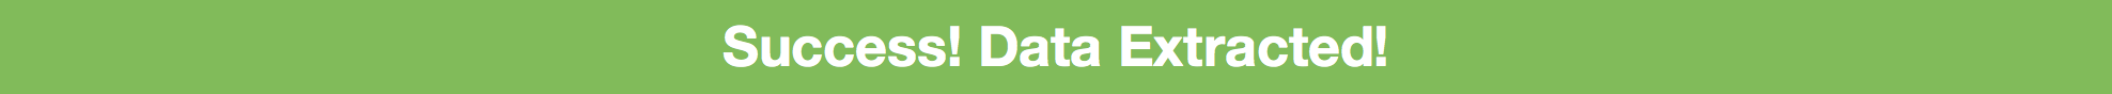

<hr style="opacity:0.5;height:1px;border:none;color:#005073;background-color:#005073;" />

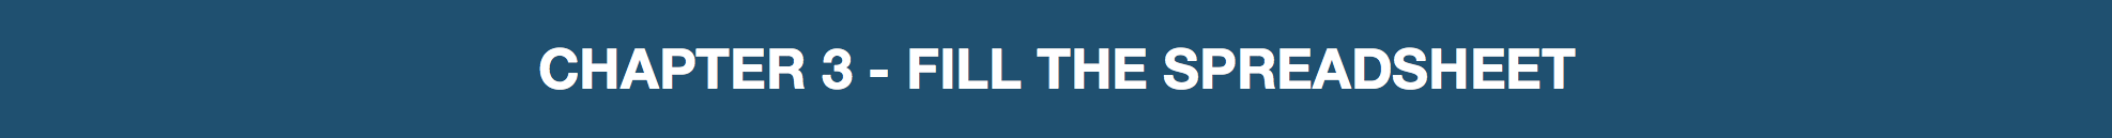

### Overview

In this chapter we're going to use our previously created **dictionary data structure** and: 
- **create a spreadsheet** using Python
- **fill the spreadsheet** with that dictionary data

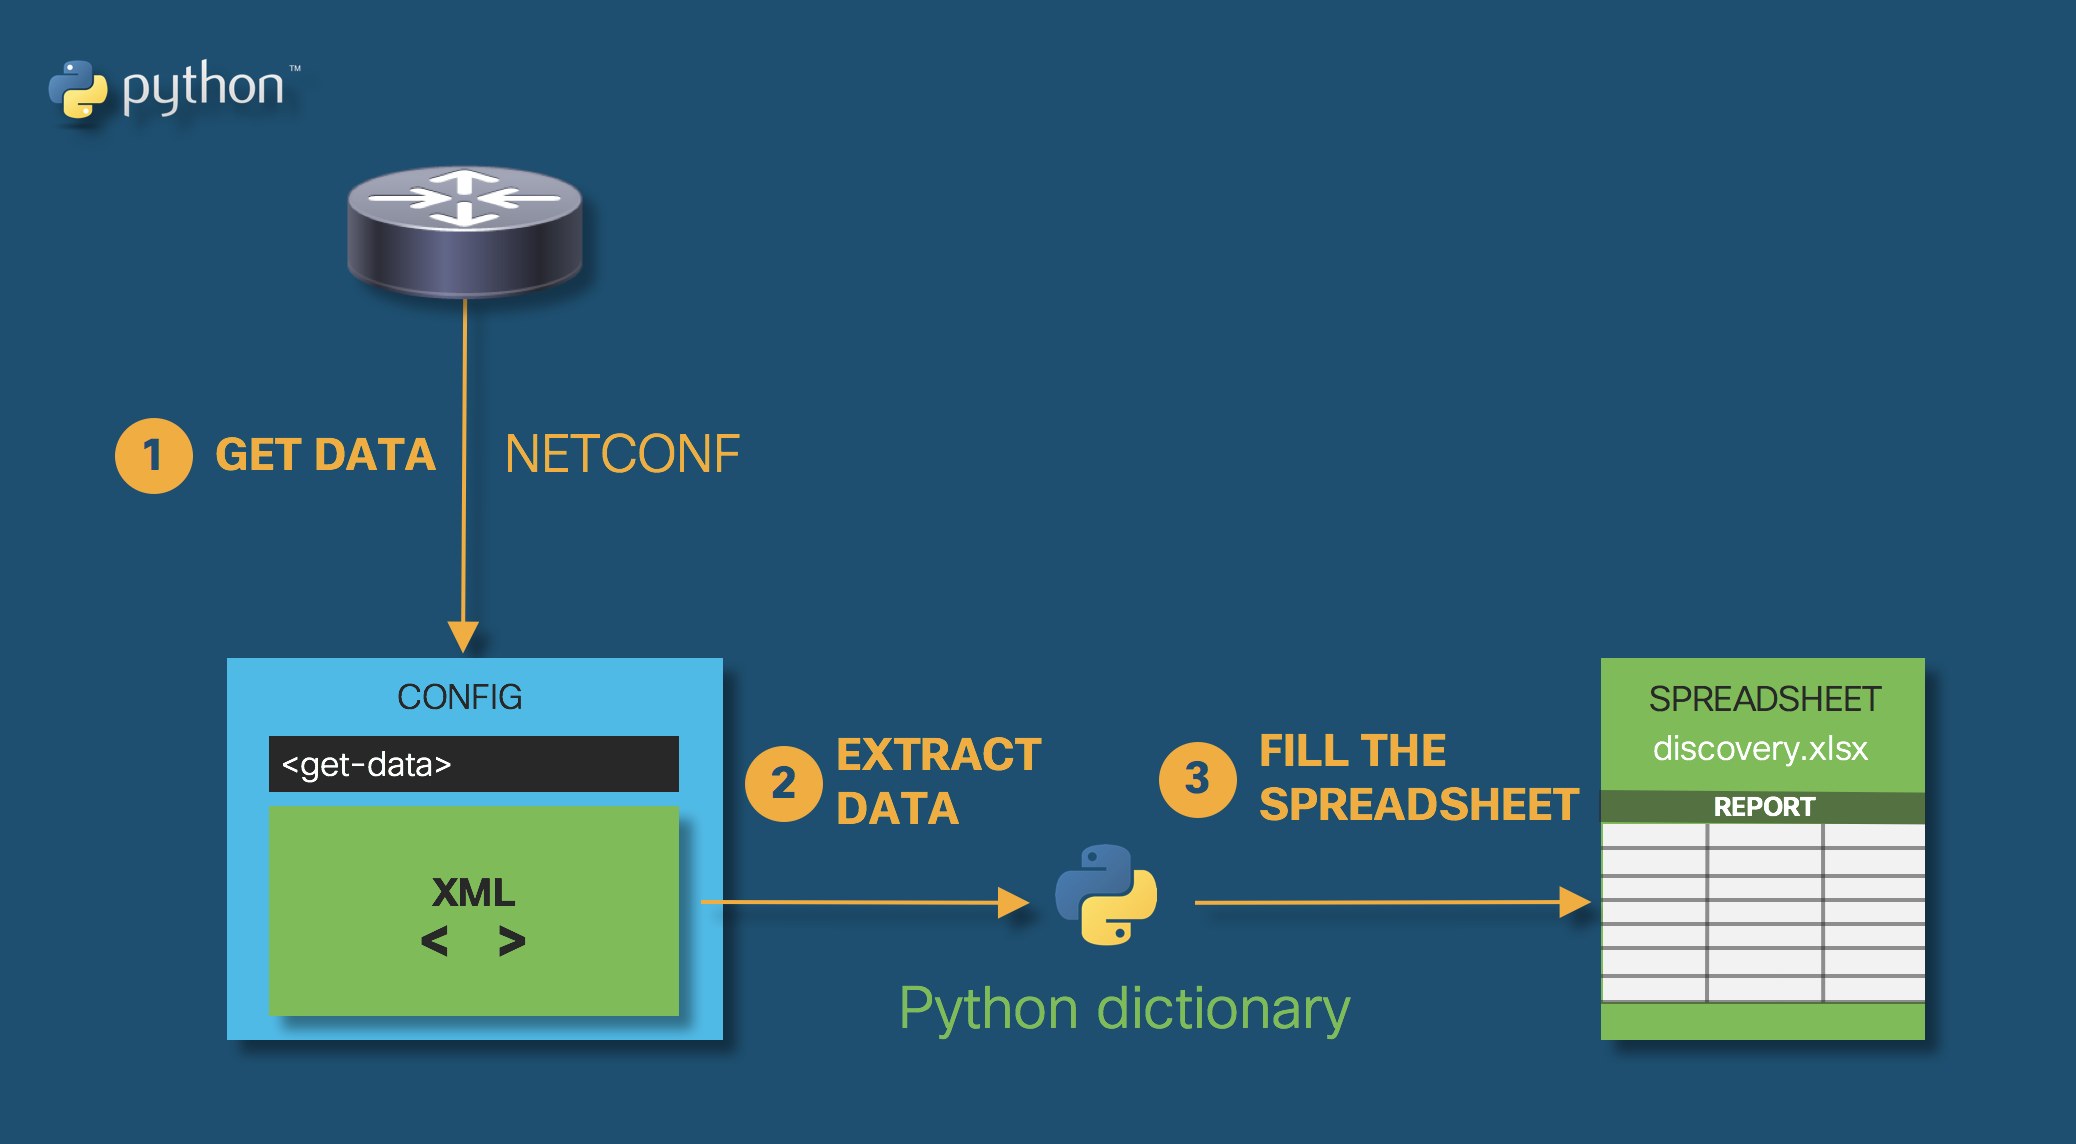

<center>To achieve this, we will use <b>Pandas</b> Python module.</center>
<center><b>Pandas</b> are our friends! Let's talk with them!</center>

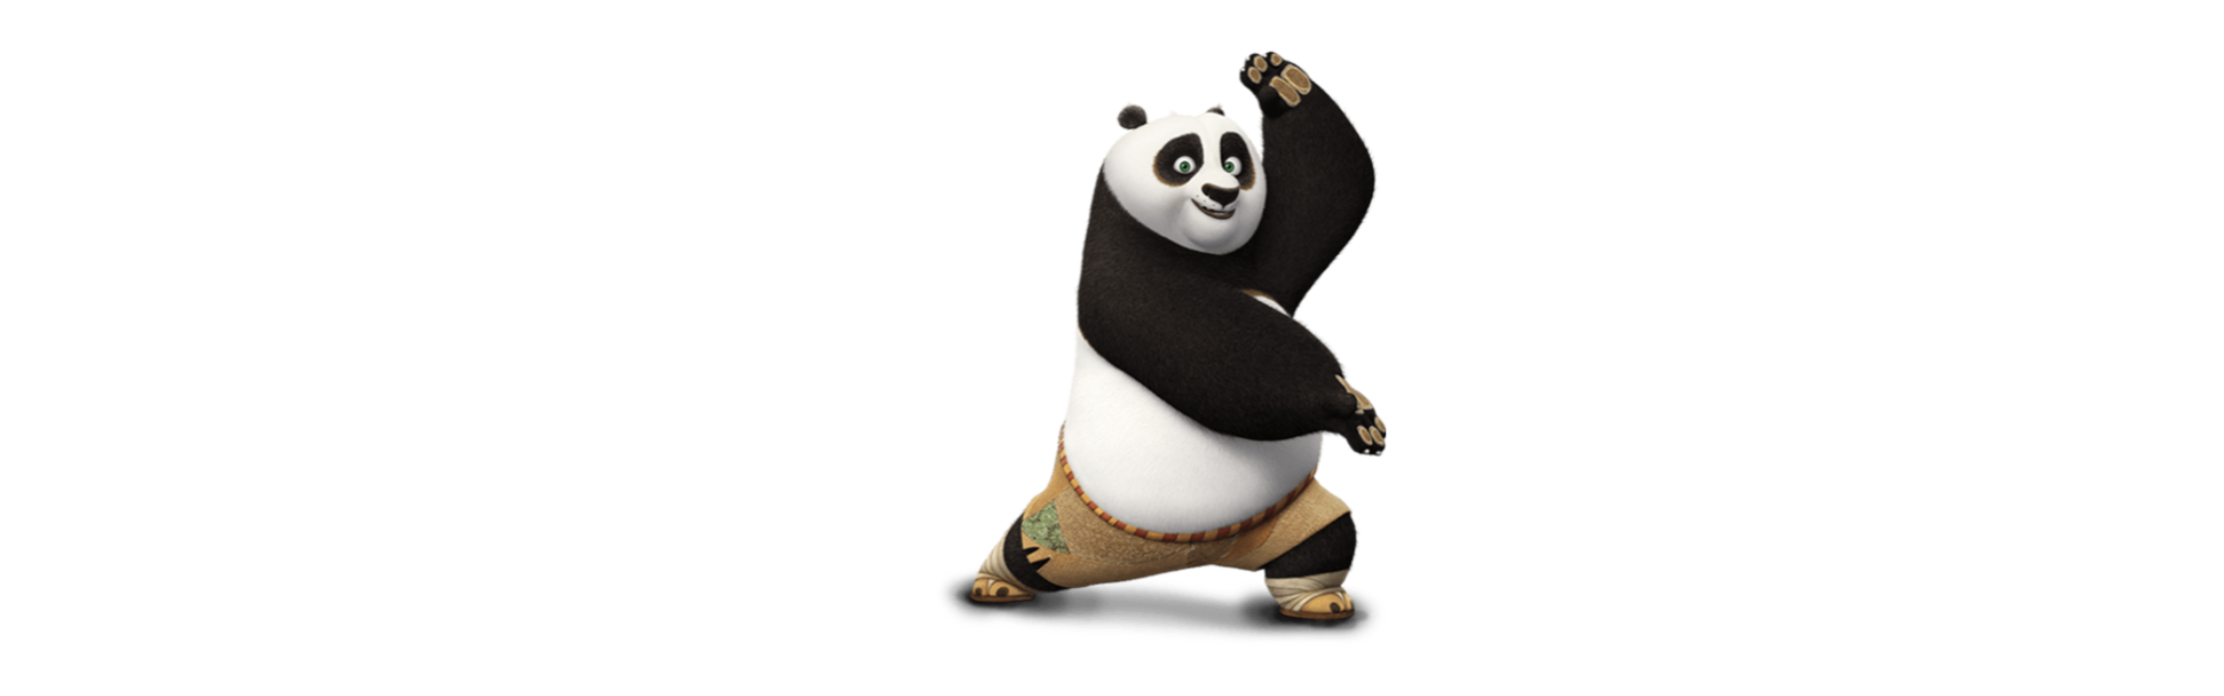

### Step 1: Import required Python modules

Let's start by importing the necessary Python modules:

In [36]:
import pandas

### Step 2: Create a spreadsheet 

</br><b>👨</b> Dear Pandas,
can you please create a spreadsheet called 'discovery.xlsx' for me?

In [37]:
spreadsheet = pandas.ExcelWriter('discovery.xlsx', engine='xlsxwriter')

</br><b>🐼</b> - Sure! It's now opened for writing!

### Step 3: Fill spreadsheet with the data

</br><b>👨</b> Dear Pandas, I have some data gathered in a Python dictionary format... can you put that data into this spreadsheet?</br>

In [38]:
dataframe = pandas.DataFrame(discovery)

**DataFrame** is the most commonly used Pandas object - it's a 2-dimensional data structure of rows and columns (like a simple table). We want to fill it with the data Python dictionary that we have gathered in the previous section - that's why we put this dict into DataFrame 'stomach' :) It's like mapping your Python data dictionary to the pure accessible Data.

*BTW: Do you see that it was worth it to put all data into the Python Dictionary? Now, everything is super simple!* :)

</br> <b>🐼</b> - No issues! See what we have filled in the spreadsheet: </br>

In [39]:
dataframe

Hostname         Interface           IP           Mask
0      CSR  GigabitEthernet1    10.0.2.15  255.255.255.0
1      CSR  GigabitEthernet2  192.168.0.1  255.255.255.0
2      CSR  GigabitEthernet3  192.168.1.1  255.255.255.0
3      CSR       Loopback101     10.1.1.1  255.255.255.0
4      CSR       Loopback102     10.2.2.2  255.255.255.0
5      CSR       Loopback103     10.3.3.3  255.255.255.0
6      CSR       Loopback104     10.4.4.4  255.255.255.0

</br><b>🐼</b> - Looks good, doesn't it? :) </br>

### Step 4: Transfer data to the specific sheet

</br><b>👨</b> Dear Pandas, last thing... I need to find this data in a specific sheet, may I? </br>

In [40]:
dataframe.to_excel(spreadsheet, sheet_name='Report', index=False)

</br><b>🐼</b> - Here you are! You will be able to access your data within your previously created spreadsheet in the specific Sheet called 'Report'.</br>

### Step 5: Save it

</br><b>👨</b> You're amazing! That's all for now, please save what we have done, thank you so much! </br>

In [41]:
spreadsheet.save()
print("*** Spreadsheet successfuly filled with the data! ***")

*** Spreadsheet successfuly filled with the data! ***


</br><b>🐼</b> - No problem my friend! See you soon again! :)</br>

**Now you can manually check if the 'discovery.xlsx' spreadsheet has been created and if data is inside!**
<br><a href="../tree/"> Click here and check the spreadsheet! </a>

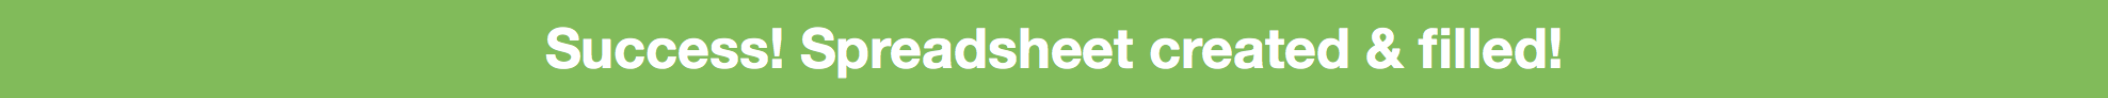

<hr style="opacity:0.5;height:1px;border:none;color:#005073;background-color:#005073;" />

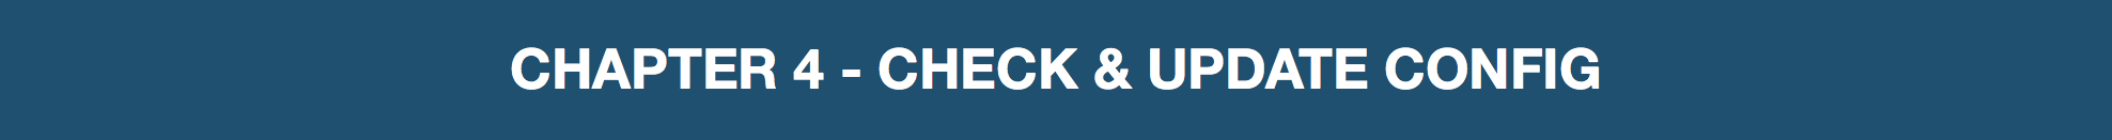

### Overview
In this last chapter we're going to check if the **current configuration** of our **device** is **compliant** with the **template configuration** in the **spreadsheet**. <br>

**If the configuration on the device is the same as the one on the spreadsheet, we're going to:**
- <p style="color:green;">show <b>config is up to date</b> message</p>


**If the configuration on the device is different, we're going to:**
- <p style="color:red;">show <b>config missmatch</b> message and print <b>config difference</b> </p>
- <b>update</b> device configuration as it stands in the spreadsheet

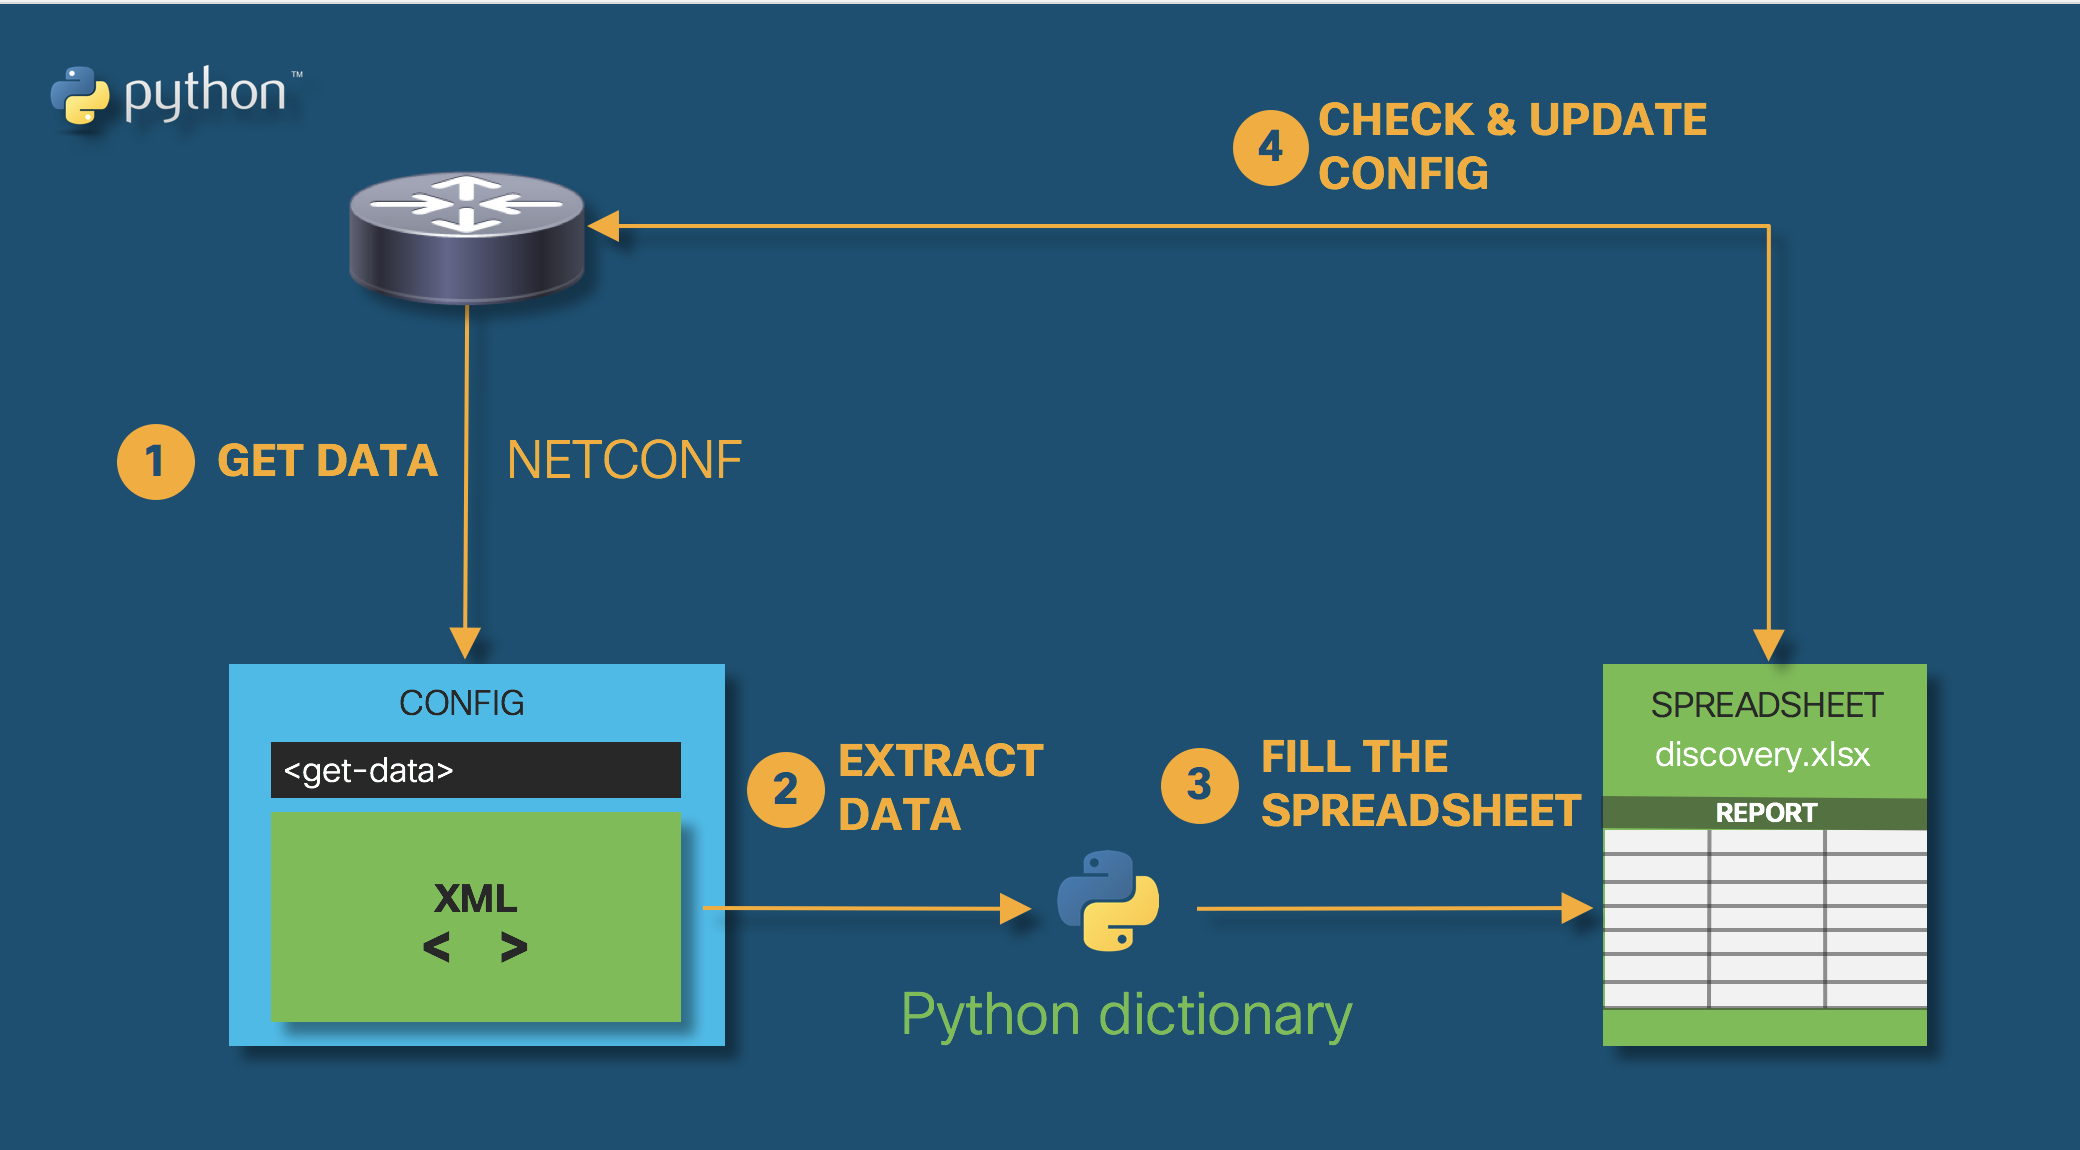

We're going to reverse the order of what we were doing in the last chapter.<br> Now, we need to read the spreadsheet and convert the DataFrame format of our data to a Python Dictionary. 

### Step 1: Read the spreadsheet

Let's first read our discovery.xlsx spreadsheet file:

In [48]:
spreadsheet = pandas.ExcelFile("discovery.xlsx", engine='openpyxl')

Then read the particular Report sheet from the file to the Python variable:

In [49]:
dataframe = spreadsheet.parse("Report")

### Step 2: Convert spreadsheet data to dictionary

Convert the **DataFrame** structure to a **Python dictionary** structure (we're now reversing the process when comparing to the previous chapter):

In [50]:
spreadsheet_dict = dataframe.to_dict('records')

### Step 3: Create NETCONF string to edit-config

Similarly to Chapter 1 of this Workshop when you were preparing a NETCONF &lt;get-config&gt; Request, now define a **NETCONF &lt;edit-config&gt;** XML string to then send a NETCONF Request which will update the interface configuration in case of any changes:

In [51]:
update_interface_config_string = '''
    <interfaces xmlns="urn:ietf:params:xml:ns:yang:ietf-interfaces">
        <interface>
            <name>%s</name>
            <ipv4 xmlns="urn:ietf:params:xml:ns:yang:ietf-ip" operation="replace">
                <address>
                    <ip>%s</ip>
                    <netmask>%s</netmask>
                </address>
            </ipv4>
            <enabled>true</enabled>
        </interface>
    </interfaces>
'''

<center>There is one difference between the &lt;get-config&gt; and &lt;edit-config&gt; strings</center><center><br><b>%s</b> signs in the string above mean that we will bind them with real <b>values</b> while executing the NETCONF Request, similar to this:<br></center>
<center><b>update_interface_config_string % Interface Name, IP address, Mask</b></center>

### Step 4: Define function to execute config update

Now we're going to define a **Python function** which allows us to later trigger its execution every time any differences between the configuration in the spreadsheet and the configuration on the device are detected.<br><br>It's going to update the configuration as it stands in the spreadsheet.

1. **Connect** to the device (in the same way as previously!)
2. Prepare a loop XML **configuration** string with all the configuration changes and bind it to the proper spreadsheet values
3. Put these changes between **&lt;config&gt;** tags
4. Push the whole configuration string using **NETCONF &lt;edit-config&gt;** operation
5. Handle exceptions and print a message

In [52]:
def update_config(changes):
    try:
        device_connection = ncclient.manager.connect(
            host = '10.10.20.48',
            username = 'developer',
            password = 'C1sco12345',
            port = '830',
            device_params = {'name':"csr"}
        )
        print("Connected to the device!")
    except:
        print("Failure...")
        
    configuration = ''


    configuration += "<config>"
    for change in range(0, len(changes)):
        configuration += update_interface_config_string % (changes[change]['Interface'], changes[change]['IP'], changes[change]['Mask'])
    configuration += "</config>"
    device_connection.edit_config(target='running', config=configuration)
    print("Config pushed successfuly!")

OK! We're prepared for the final step! 

### Step 5: Compare config - spreadsheet vs. present config

Finally, we're going to check if the configuration is compliant using Python's **if statement** (we're simply comparing 2 Python dictionaries - **spreadsheet** data converted to the dictionary and **discovery** dictionary based on current device configuration). <br>
If both dictionaries are the same - print a message. Otherwise - print all differences **(changes)** and trigger the previously defined **update_config()** function with printed information message:

In [53]:
if (spreadsheet_dict == discovery):
    print("*** Configuration is up to date! ***")
else:
    changes = [config for config in spreadsheet_dict if config not in discovery]
    print("*** " + str(len(changes)) + " configuration mismatch/es on the device. ***")
    print(changes)
    print("*** Configuration will be updated ***")
    update_config(changes)

*** 1 configuration mismatch/es on the device. ***
[{'Hostname': 'CSR', 'Interface': 'Loopback104', 'IP': '10.4.4.5', 'Mask': '255.255.255.0'}]
*** Configuration will be updated ***
Connected to the device!
Config pushed successfuly!


<center><b>Done!!!</b><center> <br>
    You should now be able to see that the  <b> Configuration is up to date! </b> <br><br>
Now open the spreadsheet manually, make some changes to the interfaces configuration and execute this Chapter again to see if the logic works! After positive execution you can go back to Chapter 1, choose the most suitable option for you and GATHER DATA once again to verify that the configuration on the device has been changed as it stands in the spreadsheet!

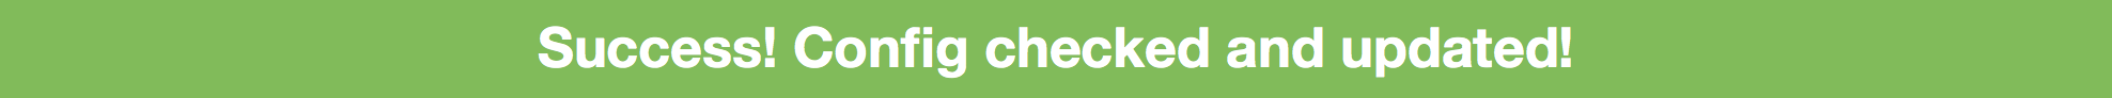

<hr style="opacity:0.5;height:2px;border:none;color:#00bceb;background-color:#00bceb;" />
<hr style="opacity:0.5;height:2px;border:none;color:#00bceb;background-color:#00bceb;" />

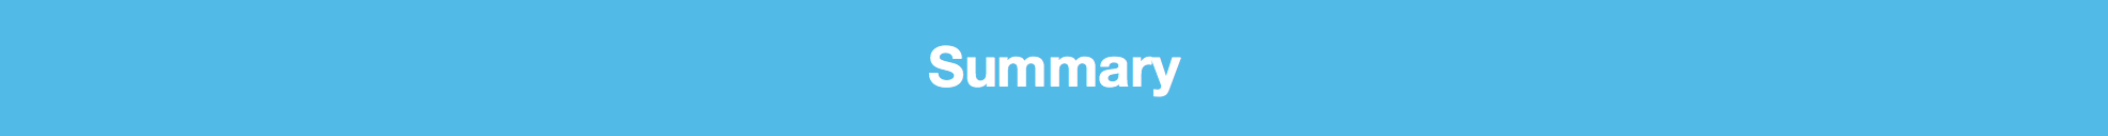

At this point, if everything went well and you didn't experience any execution errors you should already know how to:
* collect data from the device in 3 different ways: using Python Netmiko module (SSH), NETCONF and RESTCONF
* extract a specific piece of information
* create a spreadsheet and populate it with extracted data via Python
* check configuration compliance (spreadsheet vs. real configuration)
* update configuration on the device via Python

## ...in a repeatable and scalable way!



<center>
<video width="100%" height="50%" controls src="last.mov" />
</center>

That is the end of the lab instruction. I hope everything was clear and that what you have learnt will be useful!<br>
If you have any questions or ideas for improvements please contact **<email>blukasz@cisco.com</email>**, or just let me know after the lab :)

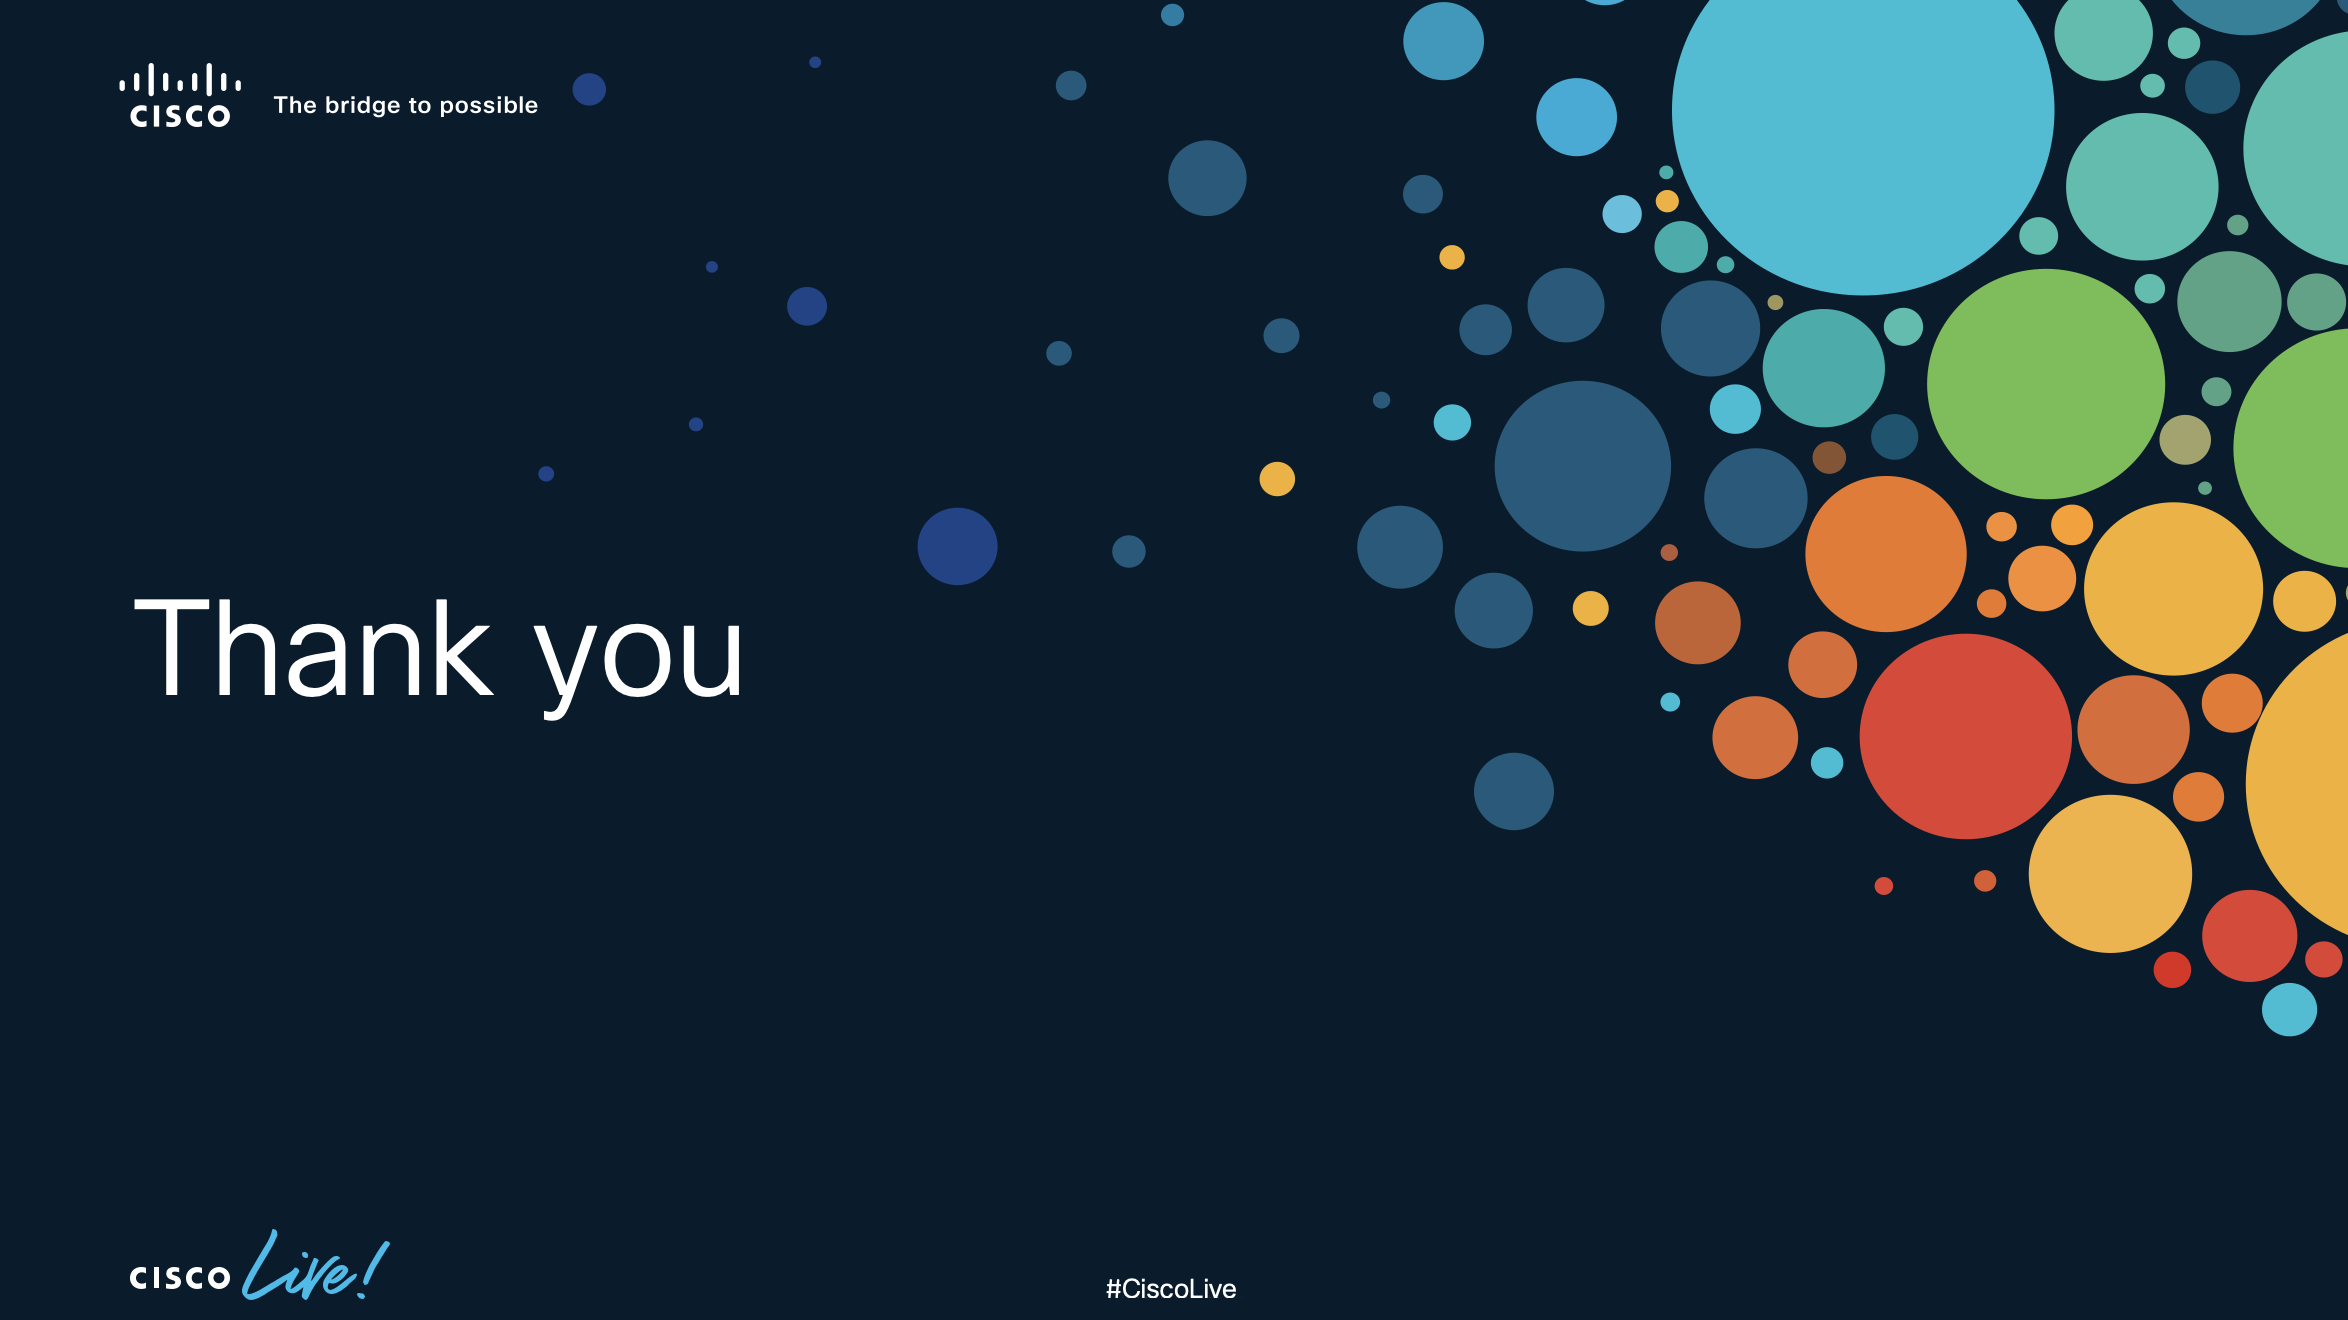

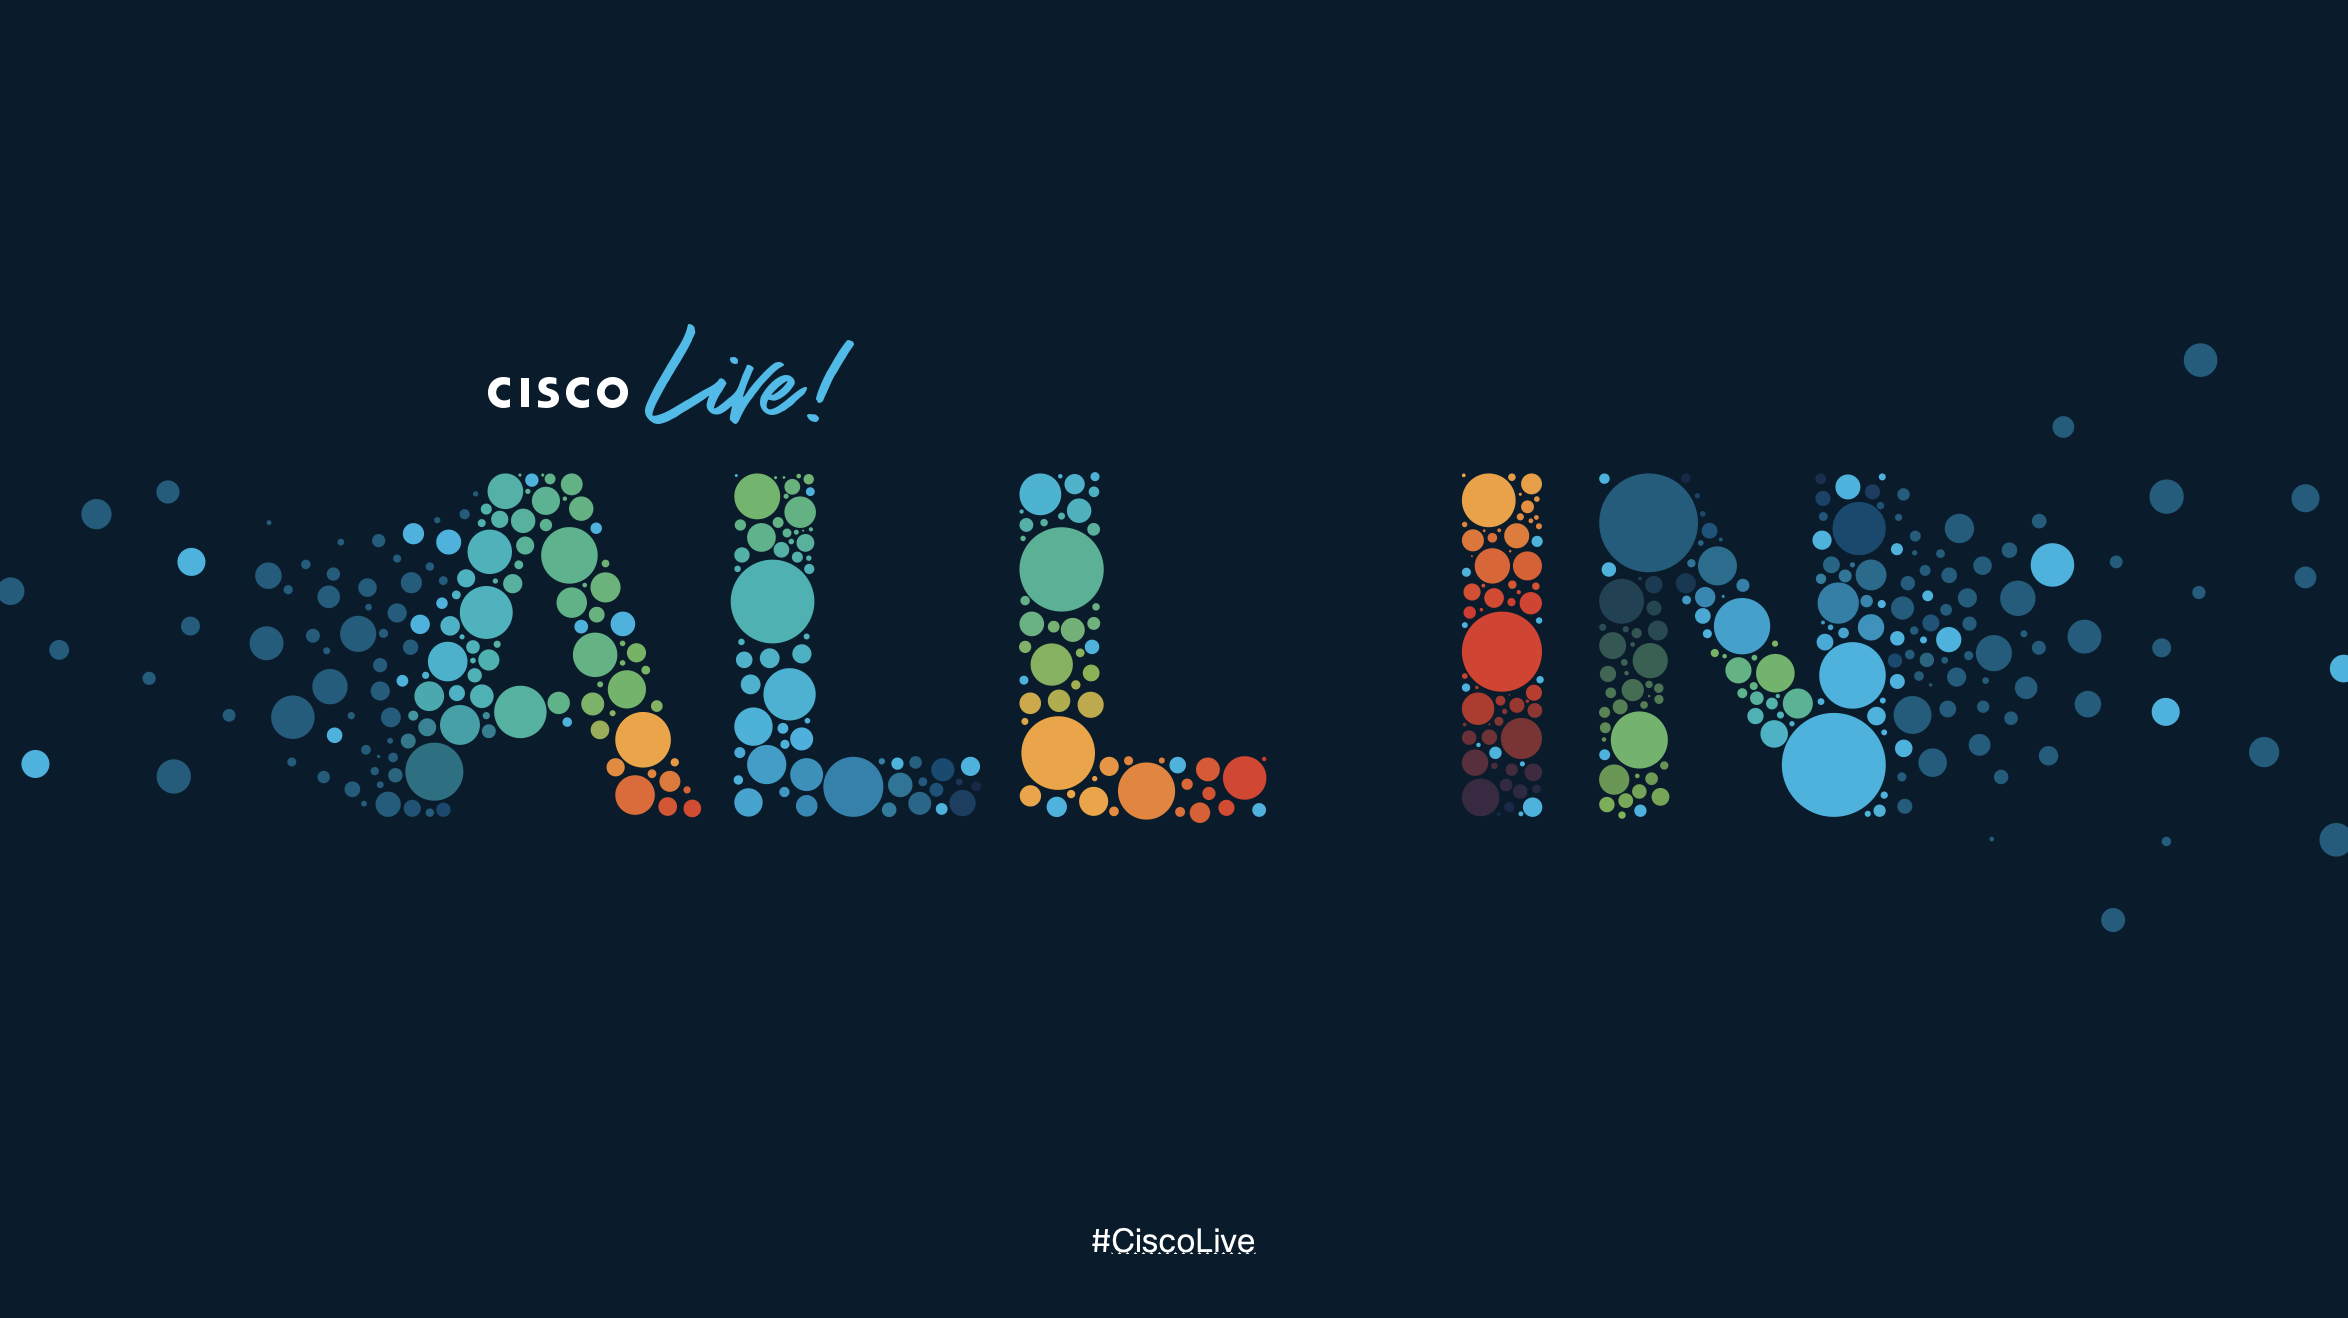

# Homeworks

## 1) Create a new loopback interface on 'CSR' router (via NETCONF)

#### 1.1) Import Python modules

In [15]:
import ncclient.manager
from ncclient.operations import TimeoutExpiredError
import xml.dom.minidom

#### 1.2) Create connection

In [ ]:
try:
    device_connection = ncclient.manager.connect(
        host = '10.10.20.48',
        username = 'developer',
        password = 'C1sco12345',
        port = '830',
        device_params = {'name':"csr"}
    )
    print("Connected to the device!")
except:
    print("Failure...")

#### 1.3) NETCONF <edit-config> XML string

In [ ]:
add_interface_string = '''
    <config>
        <native xmlns="http://cisco.com/ns/yang/Cisco-IOS-XE-native">
            <interface>
                <Loopback>
                <name>105</name>
                <description>NETCONF loopback interface</description>
                    <ip>
                        <address>
                            <primary>
                                <address>10.5.5.5</address>
                                <mask>255.255.255.0</mask>
                            </primary>
                        </address>
                    </ip>
                </Loopback>
            </interface>
        </native>
    </config>
'''

#### 1.4) Push the configuration

In [ ]:
netconf_reply = device_connection.edit_config(target='running', config=add_interface_string)
print(xml.dom.minidom.parseString(netconf_reply.xml).toprettyxml())

## 2) Verify configuration (via RESTCONF)

#### 2.1) Create URL and header

In [ ]:
url = https://10.10.20.48:443/restconf/data/Cisco-IOS-XE-native:native/interface/
headers = {'Content-Type': 'application/yang-data+json', 'Accept': 'application/yang-data+json'}

#### 2.2) Send HTTP GET request

In [ ]:
response = requests.get(url, auth=('developer', 'C1sco12345'), headers=headers, verify=False)

#### 2.3) Print the result

In [ ]:
print(response.text)

In [ ]:
{
  "Cisco-IOS-XE-native:interface": {
    "GigabitEthernet": [
      {
        "name": "1",
        "ip": {
          "address": {
            "primary": {
              "address": "10.0.2.15",
              "mask": "255.255.255.0"
            }
          }
        },
        "mop": {
          "enabled": false,
          "sysid": false
        },
        "Cisco-IOS-XE-ethernet:negotiation": {
          "auto": true
        }
      },
      {
        "name": "2",
        "shutdown": [null],
        "ip": {
          "address": {
            "primary": {
              "address": "192.168.0.1",
              "mask": "255.255.255.0"
            }
          }
        },
        "mop": {
          "enabled": false,
          "sysid": false
        },
        "Cisco-IOS-XE-ethernet:negotiation": {
          "auto": true
        }
      },
      {
        "name": "3",
        "shutdown": [null],
        "ip": {
          "address": {
            "primary": {
              "address": "192.168.1.1",
              "mask": "255.255.255.0"
            }
          }
        },
        "mop": {
          "enabled": false,
          "sysid": false
        },
        "Cisco-IOS-XE-ethernet:negotiation": {
          "auto": true
        }
      }
    ],
    "Loopback": [
      {
        "name": 101,
        "ip": {
          "address": {
            "primary": {
              "address": "10.1.1.1",
              "mask": "255.255.255.0"
            }
          }
        }
      },
      {
        "name": 102,
        "ip": {
          "address": {
            "primary": {
              "address": "10.2.2.2",
              "mask": "255.255.255.0"
            }
          }
        }
      },
      {
        "name": 103,
        "ip": {
          "address": {
            "primary": {
              "address": "10.3.3.3",
              "mask": "255.255.255.0"
            }
          }
        }
      },
      {
        "name": 104,
        "ip": {
          "address": {
            "primary": {
              "address": "10.4.4.4",
              "mask": "255.255.255.0"
            }
          }
        }
      },
      {
        "name": 105,
        "ip": {
          "address": {
            "primary": {
              "address": "10.5.5.5",
              "mask": "255.255.255.0"
            }
          }
        }
      }
    ]
  }
}